<div class="alert alert-block alert-info">
<center> <h1> BUSINESS CASE 3 - BUSINESS CASES FOR DATA SCIENCE </h1> </center> <br>
<center> MDSAA 2021/2022 </center>

**Table of Contents** <br>
* [1) Imports](#imports)
    * [1.1) Import Libraries](#importlibraries)
    * [1.2) Import Datasets](#importdataset)
* [2) Data Treatment](#datatreatment)
* [3) Create New Indicators](#newindicators)
* [4) Visual Exploration](#visual)
* [5) Modelling](#modelling)
    * [5.1) AR, MA and ARIMA](#arimamodels)
        * [5.1.1) MA Plot](#maplot)
        * [5.1.2) BTC test](#btctest)
        * [5.1.3) ADA test](#adatest)
        * [5.1.4) ATOM test](#atomtest)
        * [5.1.5) AVAX test](#avaxtest)
        * [5.1.6) AXS test](#axstest)
        * [5.1.7) ETH test](#ethtest)
        * [5.1.8) LINK test](#linktest)
        * [5.1.9) LUNA1 test](#lunatest)
        * [5.1.10) MATIC test](#matictest)
        * [5.1.11) SOL test](#soltest)
    * [5.2) LSTM and GRU](#lstm)

* [6) Predictions](#predictions) 
    * [6.1) Predictions with ARIMA](#arimapred)

Note: Predictions with LSTM and GRU are in the second notebook submited

<a class="anchor" id="imports">

## 1. Imports

</a>

<a class="anchor" id="importlibraries">

__`1.1. Import Libraries`__ 
    
</a>

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as dragon
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re


from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

import plotly.graph_objs as go
import plotly.offline as py



#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#pip install statsmodels==0.12.2
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as smapi

<a class="anchor" id="importdataset">

__`1.2. Import Datasets`__ 
    
</a>

In [684]:
#adj_close = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data\adj_close.csv')
#close = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data\close.csv')
#high = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data\high.csv')
#low = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data\low.csv')
#open_ = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data\open.csv')
#volume = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data\volume.csv')

adj_close = pd.read_csv(r'C:\Users\Asus\Desktop\BC4_crypto_forecasting\data_updated\adj_close.csv')
close = pd.read_csv(r'C:\Users\Asus\Desktop\BC4_crypto_forecasting\data_updated\close.csv')
high = pd.read_csv(r'C:\Users\Asus\Desktop\BC4_crypto_forecasting\data_updated\high.csv')
low = pd.read_csv(r'C:\Users\Asus\Desktop\BC4_crypto_forecasting\data_updated\low.csv')
open_ = pd.read_csv(r'C:\Users\Asus\Desktop\BC4_crypto_forecasting\data_updated\open.csv')
volume = pd.read_csv(r'C:\Users\Asus\Desktop\BC4_crypto_forecasting\data_updated\volume.csv')



In [685]:
open_

Date   ADA-USD   ATOM-USD   AVAX-USD    AXS-USD       BTC-USD  \
0     2017-05-09       NaN        NaN        NaN        NaN   1723.890015   
1     2017-05-10       NaN        NaN        NaN        NaN   1756.520020   
2     2017-05-11       NaN        NaN        NaN        NaN   1780.369995   
3     2017-05-12       NaN        NaN        NaN        NaN   1845.760010   
4     2017-05-13       NaN        NaN        NaN        NaN   1723.119995   
...          ...       ...        ...        ...        ...           ...   
1821  2022-05-04  0.771107  17.593870  59.658340  29.114498  37748.011719   
1822  2022-05-05  0.897061  19.871162  67.076157  33.362663  39695.746094   
1823  2022-05-06  0.791065  17.853285  59.121109  28.982380  36573.183594   
1824  2022-05-07  0.783352  17.676107  57.035454  28.464800  36042.503906   
1825  2022-05-08  0.761689  16.511841  55.153175  28.747194  35473.250000   

          ETH-USD   LINK-USD  LUNA1-USD  MATIC-USD    SOL-USD  
0             NaN        NaN        NaN        NaN        NaN  
1             NaN        NaN        NaN        NaN        NaN  
2             NaN        NaN        NaN        NaN        NaN  
3             NaN        NaN        NaN        NaN        NaN  
4             NaN        NaN        NaN        NaN        NaN  
...           ...        ...        ...        ...        ...  
1821  2783.131104  11.121224  82.584396   1.075928  85.841728  
1822  2940.226562  12.153832  86.159637   1.170986  92.769791  
1823  2748.931641  10.916577  82.551933   1.064479  84.588493  
1824  2694.991943  10.799866  77.465630   1.044149  81.766670  
1825  2637.407227  10.254740  68.271729   1.024481  79.022034  

[1826 rows x 11 columns]

<a class="anchor" id="datatreatment">

## 2. Data Treatment

</a>

In [686]:
adj_close.rename(columns = {'ADA-USD':'ADA AdjClose', 'ATOM-USD':'ATOM AdjClose', 'AVAX-USD':'AVAX AdjClose', 'AXS-USD':'AXS AdjClose',
                            'BTC-USD':'BTC AdjClose', 'ETH-USD':'ETH AdjClose', 'LINK-USD':'LINK AdjClose', 'LUNA1-USD':'LUNA1 AdjClose',
                            'MATIC-USD':'MATIC AdjClose', 'SOL-USD':'SOL AdjClose'}, inplace = True)

close.rename(columns = {'ADA-USD':'ADA Close', 'ATOM-USD':'ATOM Close', 'AVAX-USD':'AVAX Close', 'AXS-USD':'AXS Close',
                            'BTC-USD':'BTC Close', 'ETH-USD':'ETH Close', 'LINK-USD':'LINK Close', 'LUNA1-USD':'LUNA1 Close',
                            'MATIC-USD':'MATIC Close', 'SOL-USD':'SOL Close'}, inplace = True)

high.rename(columns = {'ADA-USD':'ADA High', 'ATOM-USD':'ATOM High', 'AVAX-USD':'AVAX High', 'AXS-USD':'AXS High',
                            'BTC-USD':'BTC High', 'ETH-USD':'ETH High', 'LINK-USD':'LINK High', 'LUNA1-USD':'LUNA1 High',
                            'MATIC-USD':'MATIC High', 'SOL-USD':'SOL High'}, inplace = True)

low.rename(columns = {'ADA-USD':'ADA Low', 'ATOM-USD':'ATOM Low', 'AVAX-USD':'AVAX Low', 'AXS-USD':'AXS Low',
                            'BTC-USD':'BTC Low', 'ETH-USD':'ETH Low', 'LINK-USD':'LINK Low', 'LUNA1-USD':'LUNA1 Low',
                            'MATIC-USD':'MATIC Low', 'SOL-USD':'SOL Low'}, inplace = True)

open_.rename(columns = {'ADA-USD':'ADA Open', 'ATOM-USD':'ATOM Open', 'AVAX-USD':'AVAX Open', 'AXS-USD':'AXS Open',
                            'BTC-USD':'BTC Open', 'ETH-USD':'ETH Open', 'LINK-USD':'LINK Open', 'LUNA1-USD':'LUNA1 Open',
                            'MATIC-USD':'MATIC Open', 'SOL-USD':'SOL Open'}, inplace = True)

volume.rename(columns = {'ADA-USD':'ADA Volume', 'ATOM-USD':'ATOM Volume', 'AVAX-USD':'AVAX Volume', 'AXS-USD':'AXS Volume',
                            'BTC-USD':'BTC Volume', 'ETH-USD':'ETH Volume', 'LINK-USD':'LINK Volume', 'LUNA1-USD':'LUNA1 Volume',
                            'MATIC-USD':'MATIC Volume', 'SOL-USD':'SOL Volume'}, inplace = True)

In [687]:
close.drop('Date', axis = 1, inplace = True)
high.drop('Date', axis = 1, inplace = True)
low.drop('Date', axis = 1, inplace = True)
open_.drop('Date', axis = 1, inplace = True)
volume.drop('Date', axis = 1, inplace = True)

In [688]:
dfs = [adj_close, close, high, low, open_, volume]

In [689]:
dataset = pd.concat(dfs, axis = 1)
dataset

Date  ADA AdjClose  ATOM AdjClose  AVAX AdjClose  AXS AdjClose  \
0     2017-05-09           NaN            NaN            NaN           NaN   
1     2017-05-10           NaN            NaN            NaN           NaN   
2     2017-05-11           NaN            NaN            NaN           NaN   
3     2017-05-12           NaN            NaN            NaN           NaN   
4     2017-05-13           NaN            NaN            NaN           NaN   
...          ...           ...            ...            ...           ...   
1821  2022-05-04      0.896942      19.876862      67.086105     33.363853   
1822  2022-05-05      0.791152      17.853285      59.127441     28.984409   
1823  2022-05-06      0.783359      17.674110      57.034325     28.462557   
1824  2022-05-07      0.761882      16.475998      55.156693     28.750196   
1825  2022-05-08      0.744362      15.785578      51.730221     30.405958   

      BTC AdjClose  ETH AdjClose  LINK AdjClose  LUNA1 AdjClose  \
0      1755.359985           NaN            NaN             NaN   
1      1787.130005           NaN            NaN             NaN   
2      1848.569946           NaN            NaN             NaN   
3      1724.239990           NaN            NaN             NaN   
4      1804.910034           NaN            NaN             NaN   
...            ...           ...            ...             ...   
1821  39698.371094   2940.644775      12.145610       86.172264   
1822  36575.140625   2749.213135      10.917400       82.580406   
1823  36040.921875   2694.979736      10.799844       77.464806   
1824  35501.953125   2636.093018      10.239905       68.249123   
1825  34226.796875   2532.283691      10.044308       64.176682   

      MATIC AdjClose  ...    ADA Volume  ATOM Volume   AVAX Volume  \
0                NaN  ...           NaN          NaN           NaN   
1                NaN  ...           NaN          NaN           NaN   
2                NaN  ...           NaN          NaN           NaN   
3                NaN  ...           NaN          NaN           NaN   
4                NaN  ...           NaN          NaN           NaN   
...              ...  ...           ...          ...           ...   
1821        1.171032  ...  1.516023e+09  549565214.0  8.757237e+08   
1822        1.064691  ...  1.802129e+09  614325972.0  1.259826e+09   
1823        1.044133  ...  1.312284e+09  447936108.0  8.872802e+08   
1824        1.021204  ...  8.015589e+08  455478758.0  5.551183e+08   
1825        0.979784  ...  1.092425e+09  412976512.0  8.406972e+08   

       AXS Volume   BTC Volume    ETH Volume  LINK Volume  LUNA1 Volume  \
0             NaN   1167920000           NaN          NaN           NaN   
1             NaN    915723008           NaN          NaN           NaN   
2             NaN    799489984           NaN          NaN           NaN   
3             NaN    740984000           NaN          NaN           NaN   
4             NaN    579635008           NaN          NaN           NaN   
...           ...          ...           ...          ...           ...   
1821  379974515.0  36754404490  1.818675e+10  501855323.0  1.941975e+09   
1822  488287918.0  43106256317  2.264293e+10  560835165.0  2.276428e+09   
1823  279097266.0  37795577489  2.102760e+10  507557055.0  2.178574e+09   
1824  233434007.0  24375896406  1.336928e+10  354478668.0  3.054300e+09   
1825  509740576.0  36945944576  2.095508e+10  430948928.0  5.255014e+09   

      MATIC Volume    SOL Volume  
0              NaN           NaN  
1              NaN           NaN  
2              NaN           NaN  
3              NaN           NaN  
4              NaN           NaN  
...            ...           ...  
1821   742971942.0  1.428455e+09  
1822   759187845.0  1.805979e+09  
1823   704670768.0  1.585082e+09  
1824   618880005.0  1.139093e+09  
1825   576489152.0  1.447528e+09  

[1826 rows x 61 columns]

In [690]:
dataset.columns

Index(['Date', 'ADA AdjClose', 'ATOM AdjClose', 'AVAX AdjClose',
       'AXS AdjClose', 'BTC AdjClose', 'ETH AdjClose', 'LINK AdjClose',
       'LUNA1 AdjClose', 'MATIC AdjClose', 'SOL AdjClose', 'ADA Close',
       'ATOM Close', 'AVAX Close', 'AXS Close', 'BTC Close', 'ETH Close',
       'LINK Close', 'LUNA1 Close', 'MATIC Close', 'SOL Close', 'ADA High',
       'ATOM High', 'AVAX High', 'AXS High', 'BTC High', 'ETH High',
       'LINK High', 'LUNA1 High', 'MATIC High', 'SOL High', 'ADA Low',
       'ATOM Low', 'AVAX Low', 'AXS Low', 'BTC Low', 'ETH Low', 'LINK Low',
       'LUNA1 Low', 'MATIC Low', 'SOL Low', 'ADA Open', 'ATOM Open',
       'AVAX Open', 'AXS Open', 'BTC Open', 'ETH Open', 'LINK Open',
       'LUNA1 Open', 'MATIC Open', 'SOL Open', 'ADA Volume', 'ATOM Volume',
       'AVAX Volume', 'AXS Volume', 'BTC Volume', 'ETH Volume', 'LINK Volume',
       'LUNA1 Volume', 'MATIC Volume', 'SOL Volume'],
      dtype='object')

In [691]:
ADA = dataset[['Date', 'ADA AdjClose', 'ADA Close', 'ADA High', 'ADA Low', 'ADA Open', 'ADA Volume']]
ATOM = dataset[['Date', 'ATOM AdjClose', 'ATOM Close', 'ATOM High', 'ATOM Low', 'ATOM Open', 'ATOM Volume']]
AVAX = dataset[['Date', 'AVAX AdjClose', 'AVAX Close', 'AVAX High', 'AVAX Low', 'AVAX Open', 'AVAX Volume']]
AXS = dataset[['Date', 'AXS AdjClose', 'AXS Close', 'AXS High', 'AXS Low', 'AXS Open', 'AXS Volume']]
BTC = dataset[['Date', 'BTC AdjClose', 'BTC Close', 'BTC High', 'BTC Low', 'BTC Open', 'BTC Volume']]
ETH = dataset[['Date', 'ETH AdjClose', 'ETH Close', 'ETH High', 'ETH Low', 'ETH Open', 'ETH Volume']]
LINK = dataset[['Date', 'LINK AdjClose', 'LINK Close', 'LINK High', 'LINK Low', 'LINK Open', 'LINK Volume']]
LUNA1 = dataset[['Date', 'LUNA1 AdjClose', 'LUNA1 Close', 'LUNA1 High', 'LUNA1 Low', 'LUNA1 Open', 'LUNA1 Volume']]
MATIC = dataset[['Date', 'MATIC AdjClose', 'MATIC Close', 'MATIC High', 'MATIC Low', 'MATIC Open', 'MATIC Volume']]
SOL = dataset[['Date', 'SOL AdjClose', 'SOL Close', 'SOL High', 'SOL Low', 'SOL Open', 'SOL Volume']]

In [692]:
ADA.dropna(inplace = True)

In [693]:
ADA

Date  ADA AdjClose  ADA Close  ADA High   ADA Low  ADA Open  \
184   2017-11-09      0.032053   0.032053  0.035060  0.025006  0.025160   
185   2017-11-10      0.027119   0.027119  0.033348  0.026451  0.032219   
186   2017-11-11      0.027437   0.027437  0.029659  0.025684  0.026891   
187   2017-11-12      0.023977   0.023977  0.027952  0.022591  0.027480   
188   2017-11-13      0.025808   0.025808  0.026300  0.023495  0.024364   
...          ...           ...        ...       ...       ...       ...   
1821  2022-05-04      0.896942   0.896942  0.897661  0.769638  0.771107   
1822  2022-05-05      0.791152   0.791152  0.904111  0.778141  0.897061   
1823  2022-05-06      0.783359   0.783359  0.798315  0.765742  0.791065   
1824  2022-05-07      0.761882   0.761882  0.785116  0.750657  0.783352   
1825  2022-05-08      0.744362   0.744362  0.763704  0.731738  0.761689   

        ADA Volume  
184   1.871620e+07  
185   6.766780e+06  
186   5.532220e+06  
187   7.280250e+06  
188   4.419440e+06  
...            ...  
1821  1.516023e+09  
1822  1.802129e+09  
1823  1.312284e+09  
1824  8.015589e+08  
1825  1.092425e+09  

[1642 rows x 7 columns]

In [694]:
ATOM.dropna(inplace = True)

In [695]:
ATOM

Date  ATOM AdjClose  ATOM Close  ATOM High   ATOM Low  ATOM Open  \
674   2019-03-14       6.526642    6.526642   6.639943   6.353963   6.439715   
675   2019-03-15       7.504351    7.504351   7.715249   6.432468   6.633174   
676   2019-03-16       7.383882    7.383882   8.305615   6.694531   7.507990   
677   2019-03-17       4.776164    4.776164   7.357443   4.727895   7.357443   
678   2019-03-18       5.110341    5.110341   5.229982   4.828242   4.828242   
...          ...            ...         ...        ...        ...        ...   
1821  2022-05-04      19.876862   19.876862  19.987272  17.563868  17.593870   
1822  2022-05-05      17.853285   17.853285  20.270138  17.410774  19.871162   
1823  2022-05-06      17.674110   17.674110  17.950396  17.255348  17.853285   
1824  2022-05-07      16.475998   16.475998  17.680393  16.186054  17.676107   
1825  2022-05-08      15.785578   15.785578  16.511841  15.677500  16.511841   

      ATOM Volume  
674     7318172.0  
675     6057301.0  
676     3477393.0  
677     2653565.0  
678     2567201.0  
...           ...  
1821  549565214.0  
1822  614325972.0  
1823  447936108.0  
1824  455478758.0  
1825  412976512.0  

[1152 rows x 7 columns]

In [696]:
AVAX.dropna(inplace = True)

In [697]:
AVAX

Date  AVAX AdjClose  AVAX Close  AVAX High   AVAX Low  AVAX Open  \
1161  2020-07-13       4.896294    4.896294   4.915115   4.481499   4.613968   
1162  2020-07-14       4.986754    4.986754   5.229564   4.762068   4.909865   
1232  2020-09-22       5.234632    5.234632  11.463443   4.125380   4.986754   
1233  2020-09-23       4.118469    4.118469   5.329310   3.982604   5.321654   
1234  2020-09-24       4.566561    4.566561   4.751878   3.539887   3.817925   
...          ...            ...         ...        ...        ...        ...   
1821  2022-05-04      67.086105   67.086105  67.282066  59.498161  59.658340   
1822  2022-05-05      59.127441   59.127441  69.349014  57.024452  67.076157   
1823  2022-05-06      57.034325   57.034325  59.306812  55.412495  59.121109   
1824  2022-05-07      55.156693   55.156693  57.439198  53.625706  57.035454   
1825  2022-05-08      51.730221   51.730221  55.253357  50.975513  55.153175   

       AVAX Volume  
1161  2.834000e+04  
1162  3.957000e+03  
1232  2.880988e+08  
1233  1.730912e+08  
1234  9.611096e+07  
...            ...  
1821  8.757237e+08  
1822  1.259826e+09  
1823  8.872802e+08  
1824  5.551183e+08  
1825  8.406972e+08  

[596 rows x 7 columns]

In [698]:
AXS.dropna(inplace = True)

In [699]:
AXS

Date  AXS AdjClose  AXS Close   AXS High    AXS Low   AXS Open  \
1275  2020-11-04      0.145949   0.145949   0.191121   0.141809   0.179801   
1276  2020-11-05      0.135104   0.135104   0.150565   0.126469   0.145951   
1277  2020-11-06      0.143164   0.143164   0.149547   0.123431   0.135104   
1278  2020-11-07      0.141056   0.141056   0.168470   0.134455   0.143189   
1279  2020-11-08      0.198251   0.198251   0.239455   0.139401   0.141021   
...          ...           ...        ...        ...        ...        ...   
1821  2022-05-04     33.363853  33.363853  33.633900  28.171825  29.114498   
1822  2022-05-05     28.984409  28.984409  34.753601  28.156942  33.362663   
1823  2022-05-06     28.462557  28.462557  29.047382  27.466135  28.982380   
1824  2022-05-07     28.750196  28.750196  29.423031  27.502634  28.464800   
1825  2022-05-08     30.405958  30.405958  31.376856  27.879026  28.747194   

       AXS Volume  
1275   16344570.0  
1276    4948417.0  
1277    3148629.0  
1278    1987416.0  
1279    9484360.0  
...           ...  
1821  379974515.0  
1822  488287918.0  
1823  279097266.0  
1824  233434007.0  
1825  509740576.0  

[551 rows x 7 columns]

In [700]:
BTC.isna().sum()

Date            0
BTC AdjClose    0
BTC Close       0
BTC High        0
BTC Low         0
BTC Open        0
BTC Volume      0
dtype: int64

In [701]:
ETH.dropna(inplace = True)

In [702]:
ETH

Date  ETH AdjClose    ETH Close     ETH High      ETH Low  \
184   2017-11-09    320.884003   320.884003   329.451996   307.056000   
185   2017-11-10    299.252991   299.252991   324.717987   294.541992   
186   2017-11-11    314.681000   314.681000   319.453003   298.191986   
187   2017-11-12    307.907990   307.907990   319.153015   298.513000   
188   2017-11-13    316.716003   316.716003   328.415009   307.024994   
...          ...           ...          ...          ...          ...   
1821  2022-05-04   2940.644775  2940.644775  2956.686768  2779.273682   
1822  2022-05-05   2749.213135  2749.213135  2948.960693  2704.916260   
1823  2022-05-06   2694.979736  2694.979736  2754.837646  2645.335205   
1824  2022-05-07   2636.093018  2636.093018  2696.652832  2599.523438   
1825  2022-05-08   2532.283691  2532.283691  2637.854004  2504.324707   

         ETH Open    ETH Volume  
184    308.644989  8.932500e+08  
185    320.670990  8.859860e+08  
186    298.585999  8.423010e+08  
187    314.690002  1.613480e+09  
188    307.024994  1.041890e+09  
...           ...           ...  
1821  2783.131104  1.818675e+10  
1822  2940.226562  2.264293e+10  
1823  2748.931641  2.102760e+10  
1824  2694.991943  1.336928e+10  
1825  2637.407227  2.095508e+10  

[1642 rows x 7 columns]

In [703]:
LINK.dropna(inplace = True)

In [704]:
LINK

Date  LINK AdjClose  LINK Close  LINK High   LINK Low  LINK Open  \
184   2017-11-09       0.223969    0.223969   0.248233   0.195411   0.216713   
185   2017-11-10       0.187602    0.187602   0.231280   0.180161   0.224700   
186   2017-11-11       0.179770    0.179770   0.197687   0.166026   0.186398   
187   2017-11-12       0.170898    0.170898   0.198376   0.145948   0.179667   
188   2017-11-13       0.183071    0.183071   0.205014   0.168743   0.169117   
...          ...            ...         ...        ...        ...        ...   
1821  2022-05-04      12.145610   12.145610  12.146651  11.113729  11.121224   
1822  2022-05-05      10.917400   10.917400  12.239243  10.738750  12.153832   
1823  2022-05-06      10.799844   10.799844  10.992021  10.499268  10.916577   
1824  2022-05-07      10.239905   10.239905  10.817171  10.100428  10.799866   
1825  2022-05-08      10.044308   10.044308  10.344585   9.925760  10.254740   

      LINK Volume  
184     3347920.0  
185     2125460.0  
186     2238980.0  
187     5455200.0  
188     2992650.0  
...           ...  
1821  501855323.0  
1822  560835165.0  
1823  507557055.0  
1824  354478668.0  
1825  430948928.0  

[1642 rows x 7 columns]

In [705]:
LUNA1.dropna(inplace = True)

In [706]:
LUNA1

Date  LUNA1 AdjClose  LUNA1 Close  LUNA1 High  LUNA1 Low  \
808   2019-07-26        1.327436     1.327436    1.833167   1.261695   
809   2019-07-27        1.310566     1.310566    1.402898   1.221938   
810   2019-07-28        1.272989     1.272989    1.368595   1.236858   
811   2019-07-29        1.294661     1.294661    1.375941   1.175443   
812   2019-07-30        1.294193     1.294193    1.374333   1.266484   
...          ...             ...          ...         ...        ...   
1821  2022-05-04       86.172264    86.172264   87.956352  82.267265   
1822  2022-05-05       82.580406    82.580406   87.777588  79.330872   
1823  2022-05-06       77.464806    77.464806   82.936325  77.432007   
1824  2022-05-07       68.249123    68.249123   77.494347  63.838245   
1825  2022-05-08       64.176682    64.176682   68.271729  59.578342   

      LUNA1 Open  LUNA1 Volume  
808     1.704222  1.208858e+07  
809     1.327436  6.033446e+06  
810     1.310566  1.643709e+06  
811     1.262270  3.966802e+06  
812     1.294435  1.820705e+06  
...          ...           ...  
1821   82.584396  1.941975e+09  
1822   86.159637  2.276428e+09  
1823   82.551933  2.178574e+09  
1824   77.465630  3.054300e+09  
1825   68.271729  5.255014e+09  

[1018 rows x 7 columns]

In [707]:
MATIC.dropna(inplace = True)

In [708]:
MATIC

Date  MATIC AdjClose  MATIC Close  MATIC High  MATIC Low  \
719   2019-04-28        0.004421     0.004421    0.004545   0.004317   
720   2019-04-29        0.003471     0.003471    0.004492   0.003471   
721   2019-04-30        0.004478     0.004478    0.005078   0.003458   
722   2019-05-01        0.004374     0.004374    0.004673   0.004071   
723   2019-05-02        0.004198     0.004198    0.004700   0.004096   
...          ...             ...          ...         ...        ...   
1821  2022-05-04        1.171032     1.171032    1.171143   1.073876   
1822  2022-05-05        1.064691     1.064691    1.185085   1.035494   
1823  2022-05-06        1.044133     1.044133    1.075262   1.022339   
1824  2022-05-07        1.021204     1.021204    1.064007   1.000354   
1825  2022-05-08        0.979784     0.979784    1.026015   0.966227   

      MATIC Open  MATIC Volume  
719     0.004521     8408136.0  
720     0.004418     8267044.0  
721     0.003462    25072706.0  
722     0.004440    10567352.0  
723     0.004366     6714908.0  
...          ...           ...  
1821    1.075928   742971942.0  
1822    1.170986   759187845.0  
1823    1.064479   704670768.0  
1824    1.044149   618880005.0  
1825    1.024481   576489152.0  

[1107 rows x 7 columns]

In [709]:
SOL.dropna(inplace = True)

In [710]:
SOL

Date  SOL AdjClose  SOL Close   SOL High    SOL Low   SOL Open  \
1067  2020-04-10      0.951054   0.951054   1.313487   0.694187   0.832005   
1068  2020-04-11      0.776819   0.776819   1.049073   0.765020   0.951054   
1069  2020-04-12      0.882507   0.882507   0.956670   0.762426   0.785448   
1070  2020-04-13      0.777832   0.777832   0.891603   0.773976   0.890760   
1071  2020-04-14      0.661925   0.661925   0.796472   0.628169   0.777832   
...          ...           ...        ...        ...        ...        ...   
1821  2022-05-04     92.770851  92.770851  92.937195  85.728065  85.841728   
1822  2022-05-05     84.596024  84.596024  95.032822  81.834869  92.769791   
1823  2022-05-06     81.764107  81.764107  84.646935  80.468613  84.588493   
1824  2022-05-07     78.983421  78.983421  82.180786  77.883232  81.766670   
1825  2022-05-08     75.536499  75.536499  79.194817  74.570267  79.022034   

        SOL Volume  
1067  8.736428e+07  
1068  4.386244e+07  
1069  3.873690e+07  
1070  1.821128e+07  
1071  1.674761e+07  
...            ...  
1821  1.428455e+09  
1822  1.805979e+09  
1823  1.585082e+09  
1824  1.139093e+09  
1825  1.447528e+09  

[759 rows x 7 columns]

<a class="anchor" id="newindicators">

## 3. Create New Indicators

</a>

## Create new indicators

**Stochastic Oscillator**
- %K = (Last Close – Lowest low) / (Highest high – Lowest low)
- %D = Simple Moving Average of %K

**Bollinger Bands**
- Higher band: a 20-period Simple Moving Average plus 2 times the 20-period rolling standard deviation, both calculated on the close price
- Lower band: a 20-period Simple Moving Average minus 2 times the 20-period rolling standard deviation, both calculated on the close price

In [730]:
def create_indicators(df, stk):
    
    # Stochastic Oscillator
    df[stk + '14-high'] = df[stk + 'High'].rolling(14).max()
    df[stk + '14-low'] = df[stk + 'Low'].rolling(14).min()
    df[stk + '%K'] = (df[stk + 'Close'] - df[stk + '14-low'])*100/(df[stk + '14-high'] - df[stk + '14-low'])
    df[stk + '%D'] = df[stk + '%K'].rolling(3).mean()
    
    # Bollinger Bands
    period = 20
    multiplier = 2
    
    df[stk + 'UpperBand'] = df[stk + 'Close'].rolling(period).mean() + df[stk + 'Close'].rolling(period).std() * multiplier
    df[stk + 'LowerBand'] = df[stk + 'Close'].rolling(period).mean() - df[stk + 'Close'].rolling(period).std() * multiplier
    df[stk + 'SMA'] = df[stk + 'Close'].rolling(window = period).mean()

**ADA, ATOM, AVAX, AXS, BTC, ETH, LINK, LUNA1, MATIC, SOL**

In [731]:
create_indicators(ADA, 'ADA ')
create_indicators(ATOM, 'ATOM ')
create_indicators(AVAX, 'AVAX ')
create_indicators(BTC, 'BTC ')
create_indicators(ETH, 'ETH ')
create_indicators(LINK, 'LINK ')
create_indicators(LUNA1, 'LUNA1 ')
create_indicators(MATIC, 'MATIC ')
create_indicators(SOL, 'SOL ')

**ADA, ATOM, AVAX, AXS, BTC, ETH, LINK, LUNA1, MATIC, SOL**

In [732]:
ADA = ADA.dropna()
ATOM = ATOM.dropna()
AVAX = AVAX.dropna()
AXS = AXS.dropna()
ETH = ETH.dropna()
LINK = LINK.dropna()
LUNA1 = LUNA1.dropna()
MATIC = MATIC.dropna()
SOL = SOL.dropna()

In [733]:
LUNA1.corr()

LUNA1 AdjClose  LUNA1 Close  LUNA1 High  LUNA1 Low  \
LUNA1 AdjClose         1.000000     1.000000    0.998815   0.998100   
LUNA1 Close            1.000000     1.000000    0.998815   0.998100   
LUNA1 High             0.998815     0.998815    1.000000   0.998167   
LUNA1 Low              0.998100     0.998100    0.998167   1.000000   
LUNA1 Open             0.996743     0.996743    0.998576   0.998585   
LUNA1 Volume           0.871686     0.871686    0.877465   0.854416   
LUNA1 14-high          0.989298     0.989298    0.990828   0.989261   
LUNA1 14-low           0.978998     0.978998    0.978651   0.981893   
LUNA1 %K               0.202614     0.202614    0.194662   0.189520   
LUNA1 %D               0.215566     0.215566    0.214492   0.209590   
LUNA1 UpperBand        0.983876     0.983876    0.985534   0.984572   
LUNA1 LowerBand        0.959975     0.959975    0.959379   0.962690   
LUNA1 SMA              0.982405     0.982405    0.983191   0.983900   

                 LUNA1 Open  LUNA1 Volume  LUNA1 14-high  LUNA1 14-low  \
LUNA1 AdjClose     0.996743      0.871686       0.989298      0.978998   
LUNA1 Close        0.996743      0.871686       0.989298      0.978998   
LUNA1 High         0.998576      0.877465       0.990828      0.978651   
LUNA1 Low          0.998585      0.854416       0.989261      0.981893   
LUNA1 Open         1.000000      0.864191       0.990641      0.981506   
LUNA1 Volume       0.864191      1.000000       0.866758      0.806797   
LUNA1 14-high      0.990641      0.866758       1.000000      0.984130   
LUNA1 14-low       0.981506      0.806797       0.984130      1.000000   
LUNA1 %K           0.182333      0.238611       0.136403      0.107470   
LUNA1 %D           0.208091      0.245163       0.154597      0.124373   
LUNA1 UpperBand    0.986086      0.856686       0.997842      0.981953   
LUNA1 LowerBand    0.962920      0.783490       0.968777      0.992129   
LUNA1 SMA          0.984922      0.834832       0.994456      0.993849   

                 LUNA1 %K  LUNA1 %D  LUNA1 UpperBand  LUNA1 LowerBand  \
LUNA1 AdjClose   0.202614  0.215566         0.983876         0.959975   
LUNA1 Close      0.202614  0.215566         0.983876         0.959975   
LUNA1 High       0.194662  0.214492         0.985534         0.959379   
LUNA1 Low        0.189520  0.209590         0.984572         0.962690   
LUNA1 Open       0.182333  0.208091         0.986086         0.962920   
LUNA1 Volume     0.238611  0.245163         0.856686         0.783490   
LUNA1 14-high    0.136403  0.154597         0.997842         0.968777   
LUNA1 14-low     0.107470  0.124373         0.981953         0.992129   
LUNA1 %K         1.000000  0.937322         0.125485         0.082950   
LUNA1 %D         0.937322  1.000000         0.142000         0.094008   
LUNA1 UpperBand  0.125485  0.142000         1.000000         0.966573   
LUNA1 LowerBand  0.082950  0.094008         0.966573         1.000000   
LUNA1 SMA        0.109790  0.124295         0.994918         0.987477   

                 LUNA1 SMA  
LUNA1 AdjClose    0.982405  
LUNA1 Close       0.982405  
LUNA1 High        0.983191  
LUNA1 Low         0.983900  
LUNA1 Open        0.984922  
LUNA1 Volume      0.834832  
LUNA1 14-high     0.994456  
LUNA1 14-low      0.993849  
LUNA1 %K          0.109790  
LUNA1 %D          0.124295  
LUNA1 UpperBand   0.994918  
LUNA1 LowerBand   0.987477  
LUNA1 SMA         1.000000

In [828]:
def bollinger_bands(df, n, m):
    # takes dataframe on input
    # n = smoothing length
    # m = number of standard deviations away from MA
    
    #typical price
    TP = (df['ADA High'] + df['ADA Low'] + df['ADA Close']) / 3
    # but we will use Adj close instead for now, depends
    
    data = TP
    #data = df['Adj Close']
    
    # takes one column from dataframe
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [829]:
n = 20   # datapoint rolling window
m = 2    # sigma width
df_ada = bollinger_bands(ADA, 20, 2)

In [1]:
# plot correspondingRSI values and significant levels
#plt.figure(figsize=(15,5))
#plt.title('Bollinger Bands chart ')
#plt.plot(df_ada['Date'], df_ada['ADA AdjClose'])
#plt.plot(df_ada['Date'], df_ada['BU'], alpha=0.3)
#plt.plot(df_ada['Date'], df_ada['BL'], alpha=0.3)
#plt.plot(df_ada['Date'], df_ada['B_MA'], alpha=0.3)
#plt.fill_between(df_ada['Date'], df_ada['BU'], df_ada['BL'], color='grey', alpha=0.1)

#plt.show()

In [821]:
def bollinger_bands(df, n, m):
    # takes dataframe on input
    # n = smoothing length
    # m = number of standard deviations away from MA
    
    #typical price
    TP = (df['ATOM High'] + df['ATOM Low'] + df['ATOM Close']) / 3
    # but we will use Adj close instead for now, depends
    
    data = TP
    #data = df['Adj Close']
    
    # takes one column from dataframe
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [822]:
n = 20   # datapoint rolling window
m = 2    # sigma width
df_ada = bollinger_bands(ATOM, 20, 2)

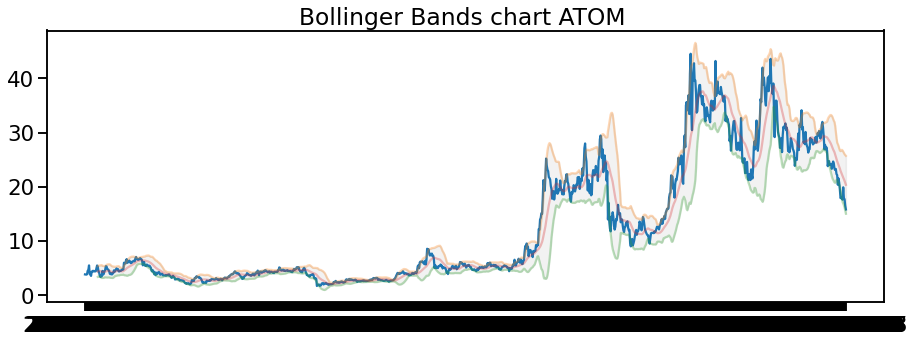

In [823]:
# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart ATOM ')
plt.plot(df_ada['Date'], df_ada['ATOM AdjClose'])
plt.plot(df_ada['Date'], df_ada['BU'], alpha=0.3)
plt.plot(df_ada['Date'], df_ada['BL'], alpha=0.3)
plt.plot(df_ada['Date'], df_ada['B_MA'], alpha=0.3)
plt.fill_between(df_ada['Date'], df_ada['BU'], df_ada['BL'], color='grey', alpha=0.1)

plt.show()

In [824]:
def bollinger_bands(df, n, m):
    # takes dataframe on input
    # n = smoothing length
    # m = number of standard deviations away from MA
    
    #typical price
    TP = (df['AVAX High'] + df['AVAX Low'] + df['AVAX Close']) / 3
    # but we will use Adj close instead for now, depends
    
    data = TP
    #data = df['Adj Close']
    
    # takes one column from dataframe
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [825]:
n = 20   # datapoint rolling window
m = 2    # sigma width
df_ada = bollinger_bands(AVAX, 20, 2)

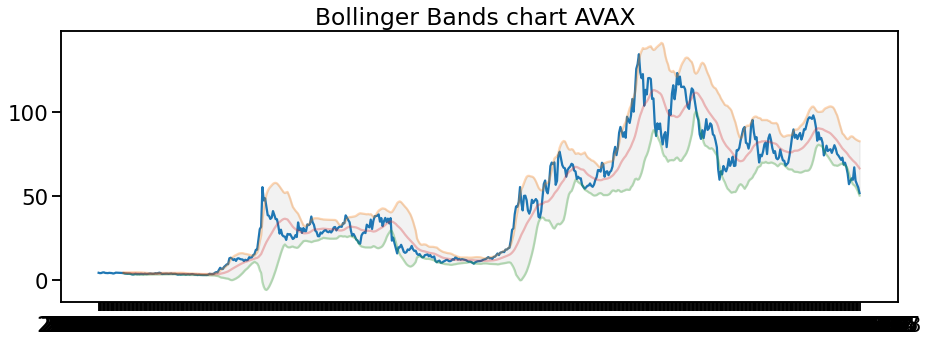

In [827]:
# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart AVAX ')
plt.plot(df_ada['Date'], df_ada['AVAX AdjClose'])
plt.plot(df_ada['Date'], df_ada['BU'], alpha=0.3)
plt.plot(df_ada['Date'], df_ada['BL'], alpha=0.3)
plt.plot(df_ada['Date'], df_ada['B_MA'], alpha=0.3)
plt.fill_between(df_ada['Date'], df_ada['BU'], df_ada['BL'], color='grey', alpha=0.1)

plt.show()

In [831]:
def bollinger_bands(df, n, m):
    # takes dataframe on input
    # n = smoothing length
    # m = number of standard deviations away from MA
    
    #typical price
    TP = (df['AXS High'] + df['AXS Low'] + df['AXS Close']) / 3
    # but we will use Adj close instead for now, depends
    
    data = TP
    #data = df['Adj Close']
    
    # takes one column from dataframe
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [832]:
n = 20   # datapoint rolling window
m = 2    # sigma width
df_ada = bollinger_bands(AXS, 20, 2)

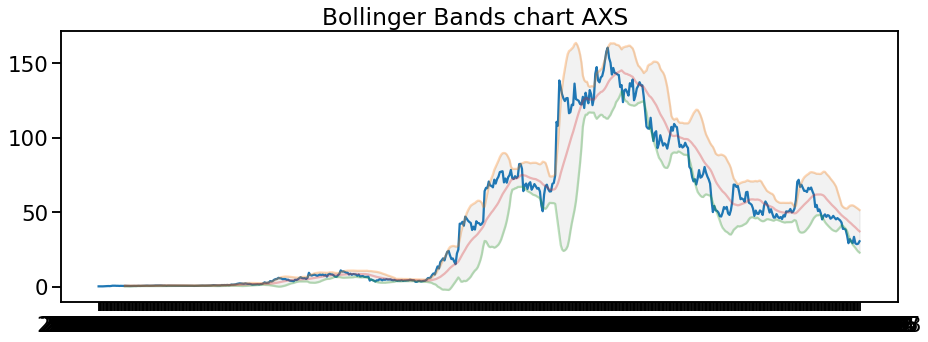

In [833]:
# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart AXS ')
plt.plot(df_ada['Date'], df_ada['AXS AdjClose'])
plt.plot(df_ada['Date'], df_ada['BU'], alpha=0.3)
plt.plot(df_ada['Date'], df_ada['BL'], alpha=0.3)
plt.plot(df_ada['Date'], df_ada['B_MA'], alpha=0.3)
plt.fill_between(df_ada['Date'], df_ada['BU'], df_ada['BL'], color='grey', alpha=0.1)

plt.show()

In [834]:
def bollinger_bands(df, n, m):
    # takes dataframe on input
    # n = smoothing length
    # m = number of standard deviations away from MA
    
    #typical price
    TP = (df['ETH High'] + df['ETH Low'] + df['ETH Close']) / 3
    # but we will use Adj close instead for now, depends
    
    data = TP
    #data = df['Adj Close']
    
    # takes one column from dataframe
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [835]:
n = 20   # datapoint rolling window
m = 2    # sigma width
df_ada = bollinger_bands(ETH, 20, 2)

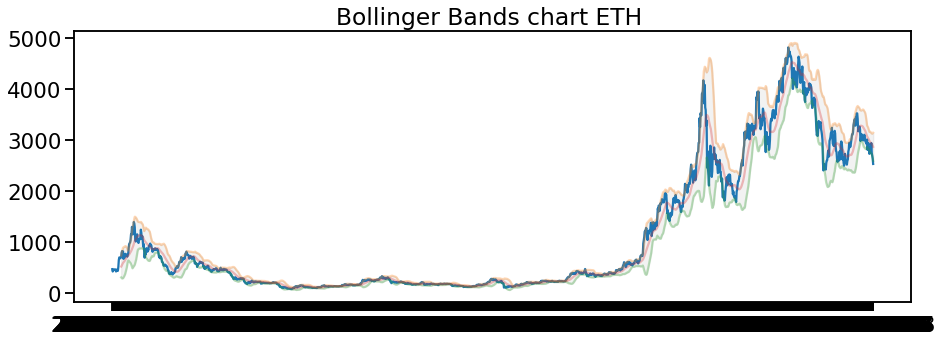

In [836]:
# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart ETH ')
plt.plot(df_ada['Date'], df_ada['ETH AdjClose'])
plt.plot(df_ada['Date'], df_ada['BU'], alpha=0.3)
plt.plot(df_ada['Date'], df_ada['BL'], alpha=0.3)
plt.plot(df_ada['Date'], df_ada['B_MA'], alpha=0.3)
plt.fill_between(df_ada['Date'], df_ada['BU'], df_ada['BL'], color='grey', alpha=0.1)

plt.show()

In [837]:
def bollinger_bands(df, n, m):
    # takes dataframe on input
    # n = smoothing length
    # m = number of standard deviations away from MA
    
    #typical price
    TP = (df['LINK High'] + df['LINK Low'] + df['LINK Close']) / 3
    # but we will use Adj close instead for now, depends
    
    data = TP
    #data = df['Adj Close']
    
    # takes one column from dataframe
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [838]:
n = 20   # datapoint rolling window
m = 2    # sigma width
df_ada = bollinger_bands(LINK, 20, 2)

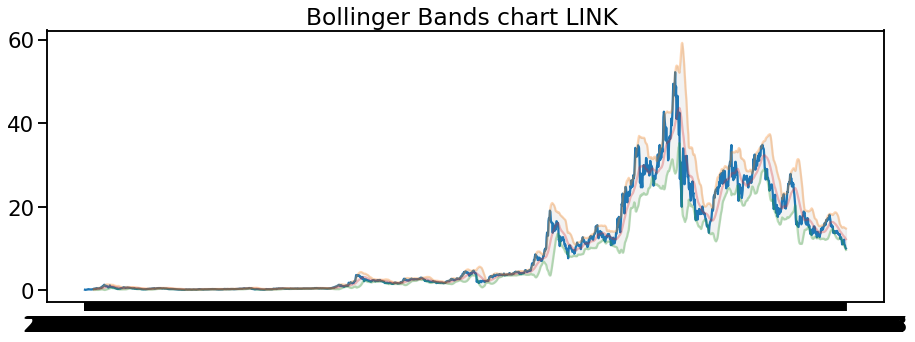

In [839]:
# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart LINK ')
plt.plot(df_ada['Date'], df_ada['LINK AdjClose'])
plt.plot(df_ada['Date'], df_ada['BU'], alpha=0.3)
plt.plot(df_ada['Date'], df_ada['BL'], alpha=0.3)
plt.plot(df_ada['Date'], df_ada['B_MA'], alpha=0.3)
plt.fill_between(df_ada['Date'], df_ada['BU'], df_ada['BL'], color='grey', alpha=0.1)

plt.show()

In [840]:
def bollinger_bands(df, n, m):
    # takes dataframe on input
    # n = smoothing length
    # m = number of standard deviations away from MA
    
    #typical price
    TP = (df['LUNA1 High'] + df['LUNA1 Low'] + df['LUNA1 Close']) / 3
    # but we will use Adj close instead for now, depends
    
    data = TP
    #data = df['Adj Close']
    
    # takes one column from dataframe
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [841]:
n = 20   # datapoint rolling window
m = 2    # sigma width
df_ada = bollinger_bands(LUNA1, 20, 2)

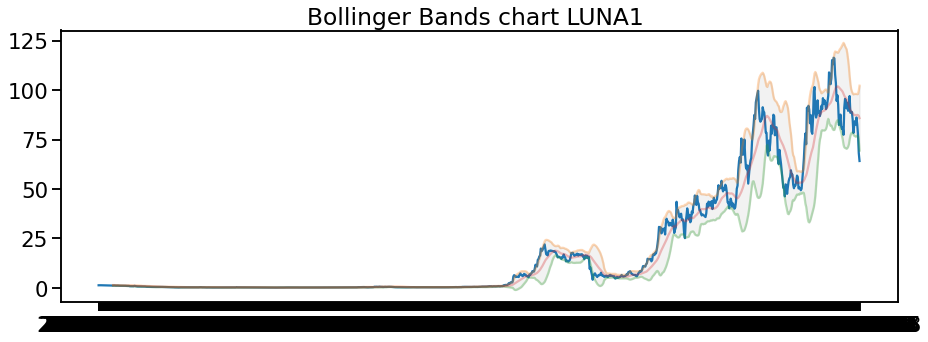

In [842]:
# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart LUNA1 ')
plt.plot(df_ada['Date'], df_ada['LUNA1 AdjClose'])
plt.plot(df_ada['Date'], df_ada['BU'], alpha=0.3)
plt.plot(df_ada['Date'], df_ada['BL'], alpha=0.3)
plt.plot(df_ada['Date'], df_ada['B_MA'], alpha=0.3)
plt.fill_between(df_ada['Date'], df_ada['BU'], df_ada['BL'], color='grey', alpha=0.1)

plt.show()

In [843]:
def bollinger_bands(df, n, m):
    # takes dataframe on input
    # n = smoothing length
    # m = number of standard deviations away from MA
    
    #typical price
    TP = (df['MATIC High'] + df['MATIC Low'] + df['MATIC Close']) / 3
    # but we will use Adj close instead for now, depends
    
    data = TP
    #data = df['Adj Close']
    
    # takes one column from dataframe
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [844]:
n = 20   # datapoint rolling window
m = 2    # sigma width
df_ada = bollinger_bands(MATIC, 20, 2)

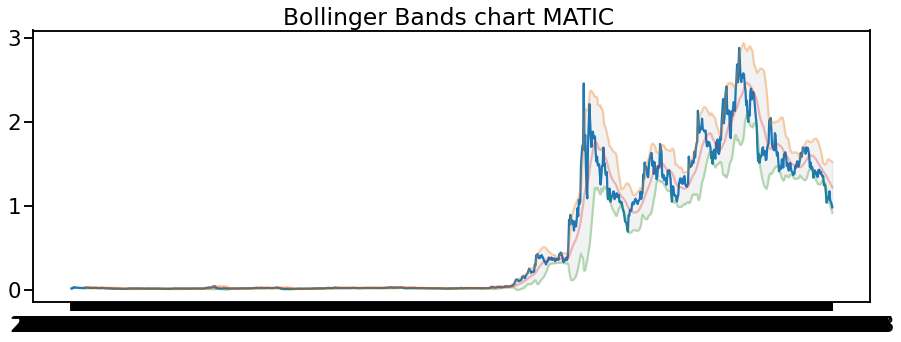

In [845]:
# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart MATIC ')
plt.plot(df_ada['Date'], df_ada['MATIC AdjClose'])
plt.plot(df_ada['Date'], df_ada['BU'], alpha=0.3)
plt.plot(df_ada['Date'], df_ada['BL'], alpha=0.3)
plt.plot(df_ada['Date'], df_ada['B_MA'], alpha=0.3)
plt.fill_between(df_ada['Date'], df_ada['BU'], df_ada['BL'], color='grey', alpha=0.1)

plt.show()

In [846]:
def bollinger_bands(df, n, m):
    # takes dataframe on input
    # n = smoothing length
    # m = number of standard deviations away from MA
    
    #typical price
    TP = (df['SOL High'] + df['SOL Low'] + df['SOL Close']) / 3
    # but we will use Adj close instead for now, depends
    
    data = TP
    #data = df['Adj Close']
    
    # takes one column from dataframe
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [847]:
n = 20   # datapoint rolling window
m = 2    # sigma width
df = bollinger_bands(SOL, 20, 2)

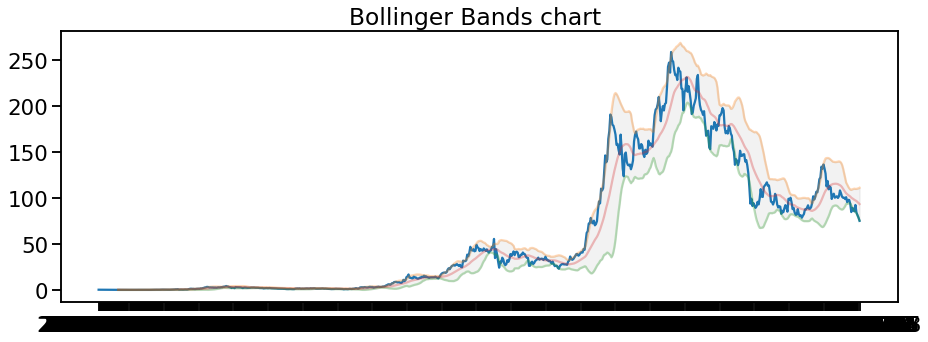

In [848]:
# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart ')
plt.plot(df['Date'], df['SOL AdjClose'])
plt.plot(df['Date'], df['BU'], alpha=0.3)
plt.plot(df['Date'], df['BL'], alpha=0.3)
plt.plot(df['Date'], df['B_MA'], alpha=0.3)
plt.fill_between(df['Date'], df['BU'], df['BL'], color='grey', alpha=0.1)

plt.show()

<a class="anchor" id="visual">

## 4. Visual Exploration

</a>

In [738]:
#in absolute prices
btc_t = go.Scatter(x=BTC.index, y=BTC['BTC Close'], name = 'BTC')
ada_t = go.Scatter(x=ADA.index, y=ADA['ADA Close'], name = 'ADA')
atom_t = go.Scatter(x=ATOM.index, y=ATOM['ATOM Close'], name = 'ATOM')
avax_t = go.Scatter(x=AVAX.index, y=AVAX['AVAX Close'], name = 'AVAX')
axs_t = go.Scatter(x=AXS.index, y=AXS['AXS Close'], name = 'AXS')
eth_t = go.Scatter(x=ETH.index, y=ETH['ETH Close'], name = 'ETH')
link_t = go.Scatter(x=LINK.index, y=LINK['LINK Close'], name = 'LINK')
luna1_t = go.Scatter(x=LUNA1.index, y=LUNA1['LUNA1 Close'], name = 'LUNA1')
matic_t = go.Scatter(x=MATIC.index, y=MATIC['MATIC Close'], name = 'MATIC')
sol_t = go.Scatter(x=SOL.index, y=SOL['SOL Close'], name = 'SOL')




py.iplot([ada_t, atom_t, avax_t,axs_t, btc_t, eth_t, link_t, luna1_t, matic_t, sol_t])

In [736]:
#comparison of percentage volatilities

btc_daily = go.Scatter(x=BTC.index, y= BTC['BTC Close'].pct_change() , name = 'BTC')
ada_daily = go.Scatter(x=ADA.index, y= ADA['ADA Close'].pct_change(), name = 'ADA')
atom_daily = go.Scatter(x=ATOM.index, y= ATOM['ATOM Close'].pct_change(), name = 'ATOM')
avax_daily = go.Scatter(x=AVAX.index, y=AVAX['AVAX Close'].pct_change(), name = 'AVAX')
axs_daily = go.Scatter(x=AXS.index, y=AXS['AXS Close'].pct_change(), name = 'AXS')
eth_daily = go.Scatter(x=ETH.index, y=ETH['ETH Close'].pct_change(), name = 'ETH')
link_daily = go.Scatter(x=LINK.index, y=LINK['LINK Close'].pct_change(), name = 'LINK')
luna1_daily = go.Scatter(x=LUNA1.index, y=LUNA1['LUNA1 Close'].pct_change(), name = 'LUNA1')
matic_daily = go.Scatter(x=MATIC.index, y=MATIC['MATIC Close'].pct_change(), name = 'MATIC')
sol_daily = go.Scatter(x=SOL.index, y=SOL['SOL Close'].pct_change(), name = 'SOL')



py.iplot([ada_daily, atom_daily, avax_daily, axs_daily, btc_daily, eth_daily, link_daily, luna1_daily, matic_daily, sol_daily])

In [230]:
#pct cummulative returns

btc_trace = go.Scatter(x=BTC.index, y= ((BTC['BTC Close'].pct_change() +1).cumprod() - 1), name = 'BTC')
ada_trace = go.Scatter(x=ADA.index, y= ((ADA['ADA Close'].pct_change()+1).cumprod() - 1), name = 'ADA')
atom_trace = go.Scatter(x=ATOM.index, y= ((ATOM['ATOM Close'].pct_change()+1).cumprod() - 1), name = 'ATOM')
avax_trace = go.Scatter(x=AVAX.index, y=((AVAX['AVAX Close'].pct_change()+1).cumprod() - 1), name = 'AVAX')
axs_trace = go.Scatter(x=AXS.index, y=((AXS['AXS Close'].pct_change()+1).cumprod() - 1), name = 'AXS')
eth_trace = go.Scatter(x=ETH.index, y=((ETH['ETH Close'].pct_change()+1).cumprod() - 1), name = 'ETH')
link_trace = go.Scatter(x=LINK.index, y=((LINK['LINK Close'].pct_change()+1).cumprod() - 1), name = 'LINK')
luna1_trace = go.Scatter(x=LUNA1.index, y=((LUNA1['LUNA1 Close'].pct_change()+1).cumprod() - 1), name = 'LUNA1')
matic_trace = go.Scatter(x=MATIC.index, y=((MATIC['MATIC Close'].pct_change()+1).cumprod() - 1), name = 'MATIC')
sol_trace = go.Scatter(x=SOL.index, y=((SOL['SOL Close'].pct_change()+1).cumprod() - 1), name = 'SOL')



py.iplot([ada_trace, atom_trace, avax_trace,axs_trace, btc_trace, eth_trace, link_trace, luna1_trace, matic_trace, sol_trace])

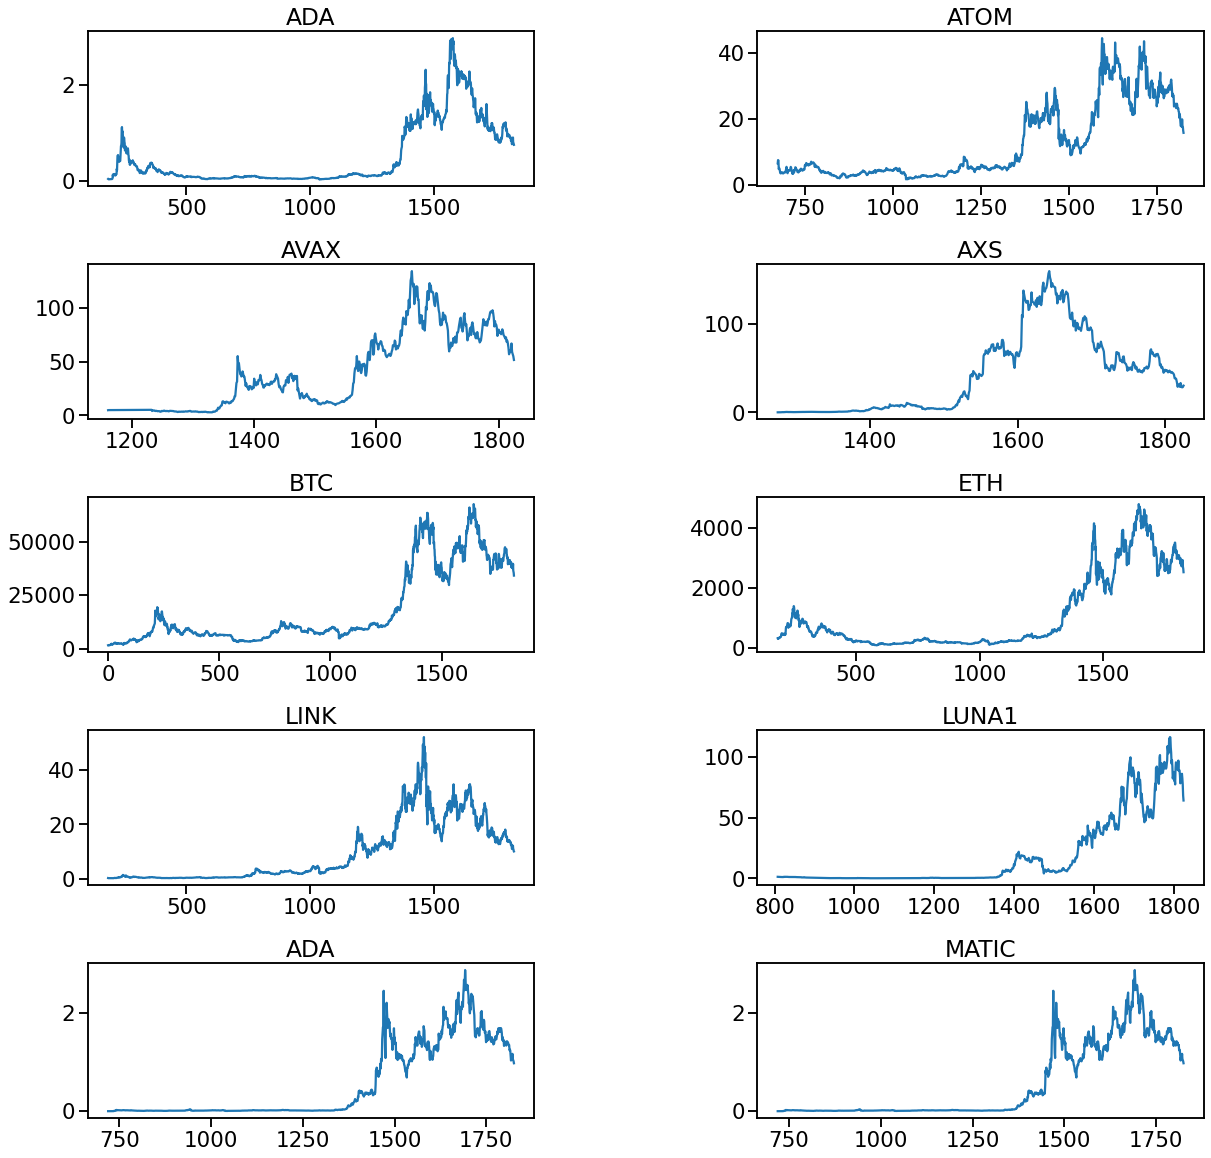

In [231]:
fig, axs = plt.subplots(5,2,figsize=(20,20), gridspec_kw = {'hspace': 0.5, 'wspace': 0.5})


axs[0,0].plot(ADA['ADA Close'])
axs[0,0].set_title('ADA')

axs[0,1].plot(ATOM['ATOM Close'])
axs[0,1].set_title('ATOM')

axs[1,0].plot(AVAX['AVAX Close'])
axs[1,0].set_title('AVAX')

axs[1,1].plot(AXS['AXS Close'])
axs[1,1].set_title('AXS')

axs[2,0].plot(BTC['BTC Close'])
axs[2,0].set_title('BTC')

axs[2,1].plot(ETH['ETH Close'])
axs[2,1].set_title('ETH')

axs[3,0].plot(LINK['LINK Close'])
axs[3,0].set_title('LINK')

axs[3,1].plot(LUNA1['LUNA1 Close'])
axs[3,1].set_title('LUNA1')

axs[4,0].plot(MATIC['MATIC Close'])
axs[4,0].set_title('ADA')

axs[4,1].plot(MATIC['MATIC Close'])
axs[4,1].set_title('MATIC')


plt.show()

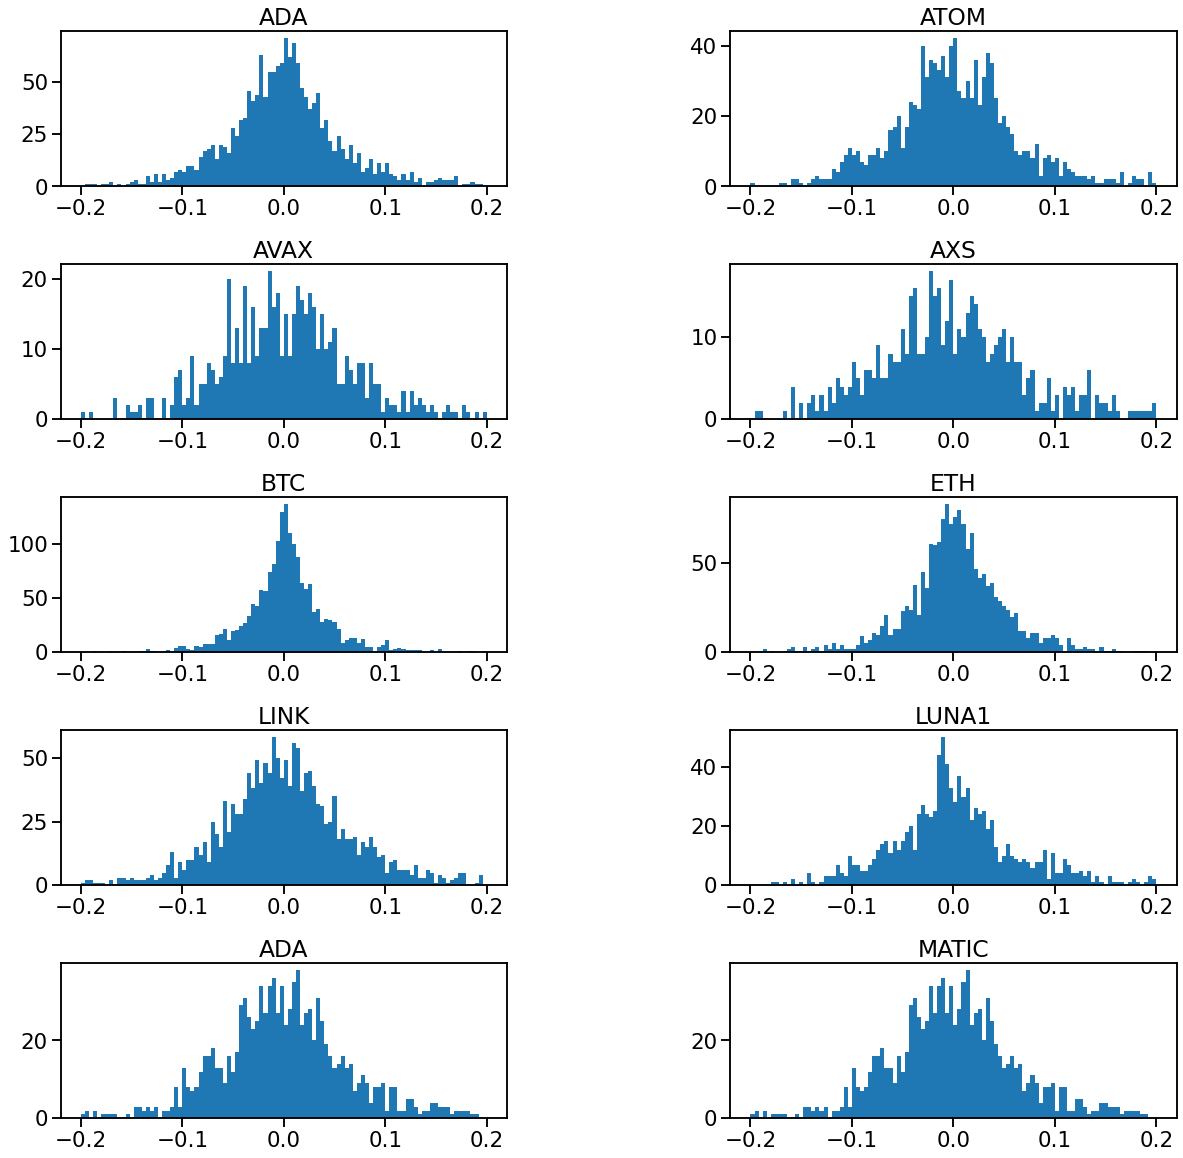

In [232]:
#Comparison of daily returns distributed

fig, axs = plt.subplots(5,2,figsize=(20,20), gridspec_kw = {'hspace': 0.5, 'wspace': 0.5})


axs[0,0].hist(ADA['ADA Close'].pct_change(), bins=100, range=(-0.2,0.2))
axs[0,0].set_title('ADA')

axs[0,1].hist(ATOM['ATOM Close'].pct_change(), bins=100, range=(-0.2,0.2))
axs[0,1].set_title('ATOM')

axs[1,0].hist(AVAX['AVAX Close'].pct_change(), bins=100, range=(-0.2,0.2))
axs[1,0].set_title('AVAX')

axs[1,1].hist(AXS['AXS Close'].pct_change(), bins=100, range=(-0.2,0.2))
axs[1,1].set_title('AXS')

axs[2,0].hist(BTC['BTC Close'].pct_change(), bins=100, range=(-0.2,0.2))
axs[2,0].set_title('BTC')

axs[2,1].hist(ETH['ETH Close'].pct_change(), bins=100, range=(-0.2,0.2))
axs[2,1].set_title('ETH')

axs[3,0].hist(LINK['LINK Close'].pct_change(), bins=100, range=(-0.2,0.2))
axs[3,0].set_title('LINK')

axs[3,1].hist(LUNA1['LUNA1 Close'].pct_change(), bins=100, range=(-0.2,0.2))
axs[3,1].set_title('LUNA1')

axs[4,0].hist(MATIC['MATIC Close'].pct_change(), bins=100, range=(-0.2,0.2))
axs[4,0].set_title('ADA')

axs[4,1].hist(MATIC['MATIC Close'].pct_change(), bins=100, range=(-0.2,0.2))
axs[4,1].set_title('MATIC')


plt.show()

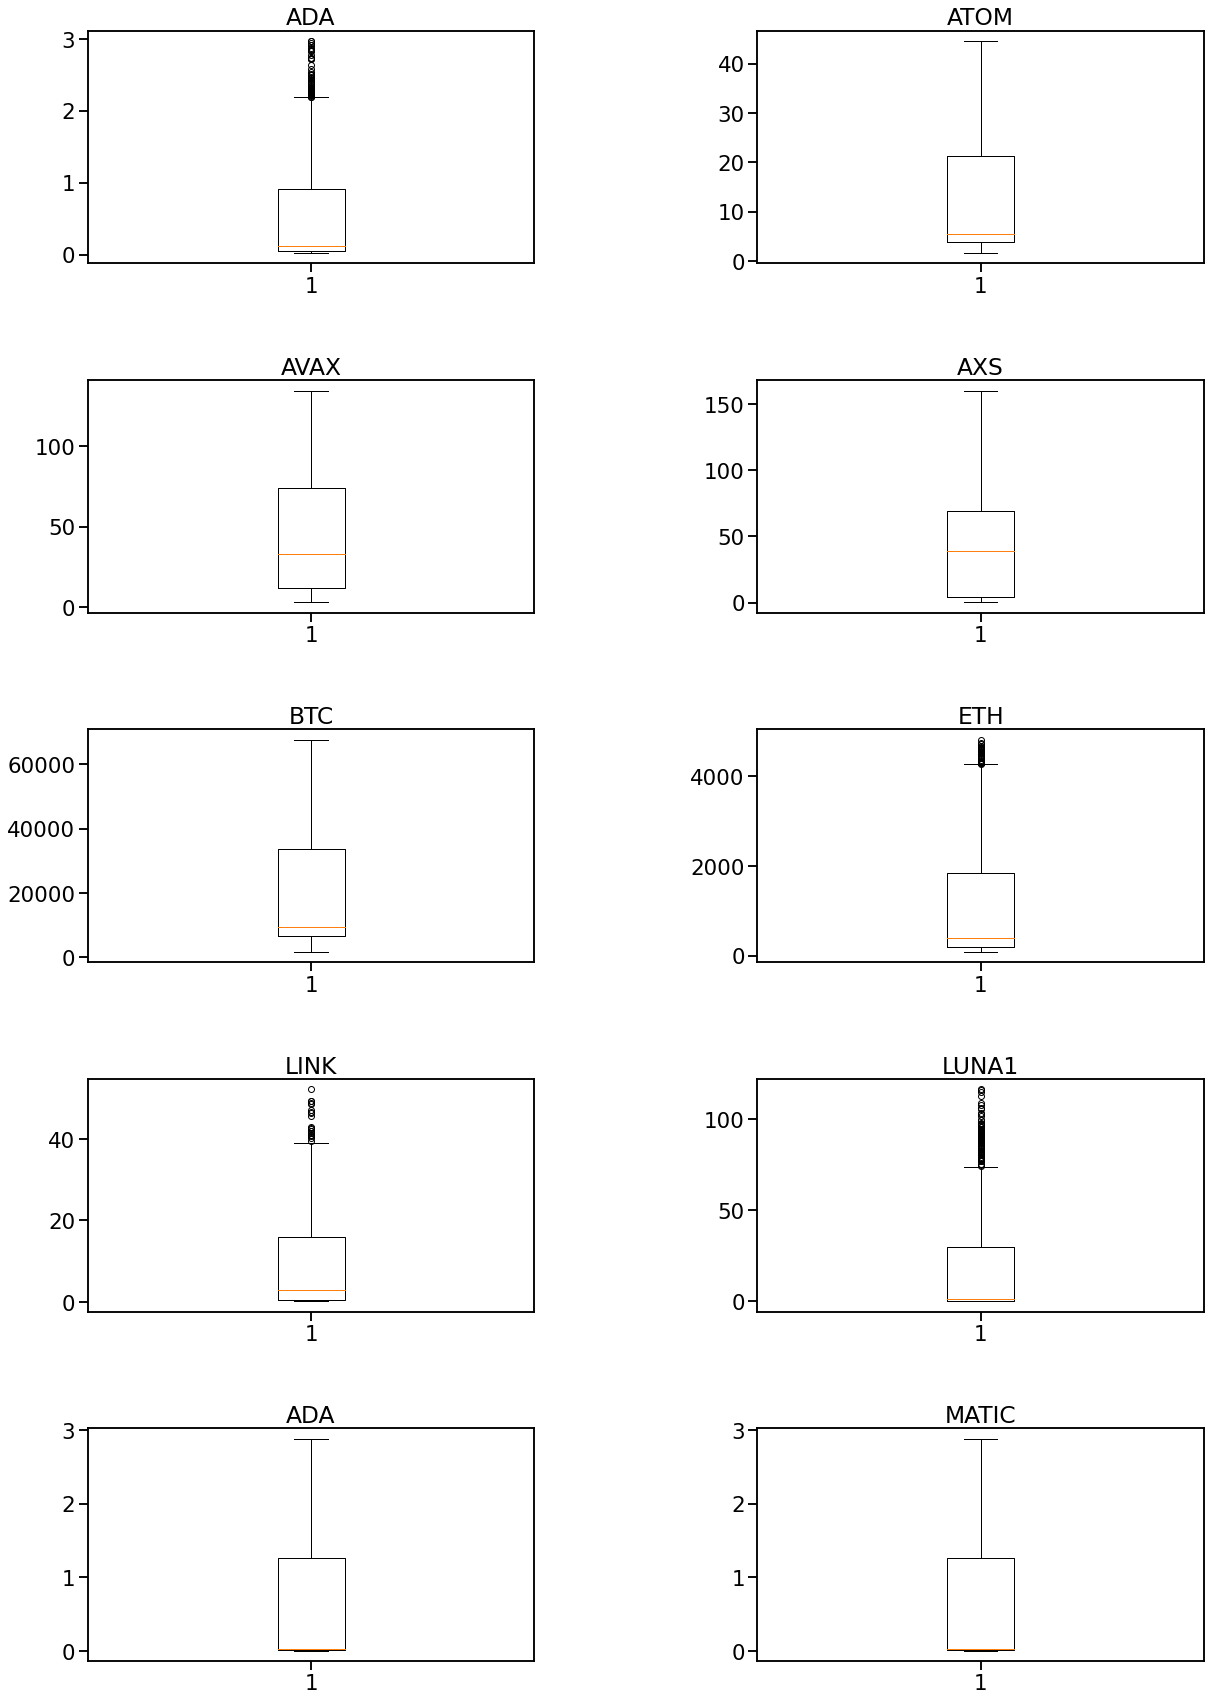

In [233]:
#Comparison of daily returns distributed

fig, axs = plt.subplots(5, 2, figsize=(20,30), gridspec_kw = {'hspace': 0.5, 'wspace': 0.5})


axs[0,0].boxplot(ADA['ADA Close'])
axs[0,0].set_title('ADA')

axs[0,1].boxplot(ATOM['ATOM Close'])
axs[0,1].set_title('ATOM')

axs[1,0].boxplot(AVAX['AVAX Close'])
axs[1,0].set_title('AVAX')

axs[1,1].boxplot(AXS['AXS Close'])
axs[1,1].set_title('AXS')

axs[2,0].boxplot(BTC['BTC Close'])
axs[2,0].set_title('BTC')

axs[2,1].boxplot(ETH['ETH Close'])
axs[2,1].set_title('ETH')

axs[3,0].boxplot(LINK['LINK Close'])
axs[3,0].set_title('LINK')

axs[3,1].boxplot(LUNA1['LUNA1 Close'])
axs[3,1].set_title('LUNA1')

axs[4,0].boxplot(MATIC['MATIC Close'])
axs[4,0].set_title('ADA')

axs[4,1].boxplot(MATIC['MATIC Close'])
axs[4,1].set_title('MATIC')


plt.show()

In [234]:
####### Percentage and cumulative plots with normalized the data ########

In [235]:
new =  pd.concat([BTC['BTC Close'], ADA['ADA Close'], ATOM['ATOM Close'], 
                  AVAX['AVAX Close'], AXS['AXS Close'], ETH['ETH Close'],
                  LINK['LINK Close'], LUNA1['LUNA1 Close'], MATIC['MATIC Close'],
                 SOL['SOL Close']], axis=1, 
                 keys=['BTC Close', 'ADA Close', 'ATOM Close', 'AVAX Close',
                      'AXS Close', 'ETH Close','LINK Close', 'LUNA1 Close',
                      'MATIC Close', 'SOL Close'])

In [236]:
new

BTC Close  ADA Close  ATOM Close  AVAX Close  AXS Close    ETH Close  \
0      1755.359985        NaN         NaN         NaN        NaN          NaN   
1      1787.130005        NaN         NaN         NaN        NaN          NaN   
2      1848.569946        NaN         NaN         NaN        NaN          NaN   
3      1724.239990        NaN         NaN         NaN        NaN          NaN   
4      1804.910034        NaN         NaN         NaN        NaN          NaN   
...            ...        ...         ...         ...        ...          ...   
1821  39698.371094   0.896942   19.876862   67.086105  33.363853  2940.644775   
1822  36575.140625   0.791152   17.853285   59.127441  28.984409  2749.213135   
1823  36040.921875   0.783359   17.674110   57.034325  28.462557  2694.979736   
1824  35501.953125   0.761882   16.475998   55.156693  28.750196  2636.093018   
1825  34226.796875   0.744362   15.785578   51.730221  30.405958  2532.283691   

      LINK Close  LUNA1 Close  MATIC Close  SOL Close  
0            NaN          NaN          NaN        NaN  
1            NaN          NaN          NaN        NaN  
2            NaN          NaN          NaN        NaN  
3            NaN          NaN          NaN        NaN  
4            NaN          NaN          NaN        NaN  
...          ...          ...          ...        ...  
1821   12.145610    86.172264     1.171032  92.770851  
1822   10.917400    82.580406     1.064691  84.596024  
1823   10.799844    77.464806     1.044133  81.764107  
1824   10.239905    68.249123     1.021204  78.983421  
1825   10.044308    64.176682     0.979784  75.536499  

[1826 rows x 10 columns]

In [237]:
new.dropna()

BTC Close  ADA Close  ATOM Close  AVAX Close  AXS Close    ETH Close  \
1275  14133.707031   0.095369    4.385509    3.184633   0.145949   402.141998   
1276  15579.848633   0.096994    4.513780    3.358205   0.135104   414.067352   
1277  15565.880859   0.109105    4.871086    3.595282   0.143164   454.719299   
1278  14833.753906   0.101379    4.617722    3.403408   0.141056   435.713135   
1279  15479.567383   0.106621    4.803346    3.476598   0.198251   453.554779   
...            ...        ...         ...         ...        ...          ...   
1821  39698.371094   0.896942   19.876862   67.086105  33.363853  2940.644775   
1822  36575.140625   0.791152   17.853285   59.127441  28.984409  2749.213135   
1823  36040.921875   0.783359   17.674110   57.034325  28.462557  2694.979736   
1824  35501.953125   0.761882   16.475998   55.156693  28.750196  2636.093018   
1825  34226.796875   0.744362   15.785578   51.730221  30.405958  2532.283691   

      LINK Close  LUNA1 Close  MATIC Close  SOL Close  
1275   10.472587     0.283994     0.012251   1.392255  
1276   10.990669     0.292366     0.013477   1.405218  
1277   12.118072     0.304737     0.015509   1.913740  
1278   11.757224     0.292365     0.014393   2.031964  
1279   12.656035     0.303016     0.015735   2.156598  
...          ...          ...          ...        ...  
1821   12.145610    86.172264     1.171032  92.770851  
1822   10.917400    82.580406     1.064691  84.596024  
1823   10.799844    77.464806     1.044133  81.764107  
1824   10.239905    68.249123     1.021204  78.983421  
1825   10.044308    64.176682     0.979784  75.536499  

[551 rows x 10 columns]

In [238]:
# Normalizing the datafrme  

def normalize_series(new):
    #take tail to drop head NA
    return new.pct_change(1).dropna()
dt = normalize_series(new)

#remove first row with NAs
dt=dt.tail(len(dt)-1)
dt.columns = ['BTC Close', 'ADA Close', 'ATOM Close', 'AVAX Close',
                      'AXS Close', 'ETH Close','LINK Close', 'LUNA1 Close',
                      'MATIC Close', 'SOL Close']
dt['BTC Close'].head()

1277   -0.000897
1278   -0.047034
1279    0.043537
1280   -0.009513
1281   -0.002701
Name: BTC Close, dtype: float64

In [239]:
# Normalizing and setting up cumulative returns in a  datafrme 
def normalize_and_accumulate_series(new):
    #take tail to drop head NA
    return new.pct_change(1).cumsum().dropna()
dtc = normalize_and_accumulate_series(new)


#remove first row with NAs
dtc=dtc.tail(len(dtc)-1)
dtc.columns =  ['BTC Close', 'ADA Close', 'ATOM Close', 'AVAX Close',
                      'AXS Close', 'ETH Close','LINK Close', 'LUNA1 Close',
                      'MATIC Close', 'SOL Close']
dtc['BTC Close'].head()

1277    3.356202
1278    3.309168
1279    3.352704
1280    3.343192
1281    3.340491
Name: BTC Close, dtype: float64

In [240]:
#comparison of percentage volatilities

btc_d = go.Scatter(x=dt.index, y= dt['BTC Close'] , name = 'BTC')
ada_d = go.Scatter(x=dt.index, y= dt['ADA Close'], name = 'ADA')
atom_d = go.Scatter(x=dt.index, y= dt['ATOM Close'], name = 'ATOM')
avax_d = go.Scatter(x=dt.index, y=dt['AVAX Close'], name = 'AVAX')
axs_d = go.Scatter(x=dt.index, y=dt['AXS Close'], name = 'AXS')
eth_d = go.Scatter(x=dt.index, y=dt['ETH Close'], name = 'ETH')
link_d = go.Scatter(x=dt.index, y=dt['LINK Close'], name = 'LINK')
luna1_d = go.Scatter(x=dt.index, y=dt['LUNA1 Close'], name = 'LUNA1')
matic_d = go.Scatter(x=dt.index, y=dt['MATIC Close'], name = 'MATIC')
sol_d = go.Scatter(x=dt.index, y=dt['SOL Close'], name = 'SOL')



py.iplot([ada_d, atom_d, avax_d, axs_d, btc_d, eth_d, link_d, luna1_d, matic_d, sol_d])

In [241]:
#comparison of percentage volatilities

btc_c = go.Scatter(x=dtc.index, y= dtc['BTC Close'] , name = 'BTC')
ada_c = go.Scatter(x=dtc.index, y= dtc['ADA Close'], name = 'ADA')
atom_c = go.Scatter(x=dtc.index, y= dtc['ATOM Close'], name = 'ATOM')
avax_c = go.Scatter(x=dtc.index, y=dtc['AVAX Close'], name = 'AVAX')
axs_c = go.Scatter(x=dtc.index, y=dtc['AXS Close'], name = 'AXS')
eth_c = go.Scatter(x=dtc.index, y=dtc['ETH Close'], name = 'ETH')
link_c = go.Scatter(x=dtc.index, y=dtc['LINK Close'], name = 'LINK')
luna1_c = go.Scatter(x=dtc.index, y=dtc['LUNA1 Close'], name = 'LUNA1')
matic_c = go.Scatter(x=dtc.index, y=dtc['MATIC Close'], name = 'MATIC')
sol_c = go.Scatter(x=dtc.index, y=dtc['SOL Close'], name = 'SOL')



py.iplot([ada_c, atom_c, avax_c, axs_c, btc_c, eth_c, link_c, luna1_c, matic_c, sol_c])

<a class="anchor" id="modelling">

## 5. Modelling

</a>

<a class="anchor" id="arimamodels">

__`5.1. AR, MA and ARIMA`__ 
    
</a>

<a class="anchor" id="maplot">

__`5.1.1 Moving Average Plot`__ 
    
</a>

In [667]:
btc_ma = BTC.copy()

In [668]:
btc_ma.set_index('Date', inplace = True)
#btc_ma

In [669]:
btc_ma = btc_ma.apply(pd.to_numeric,errors='coerce').fillna(0)

In [670]:
btc_ma.dtypes

BTC AdjClose    float64
BTC Close       float64
BTC High        float64
BTC Low         float64
BTC Open        float64
BTC Volume        int64
dtype: object

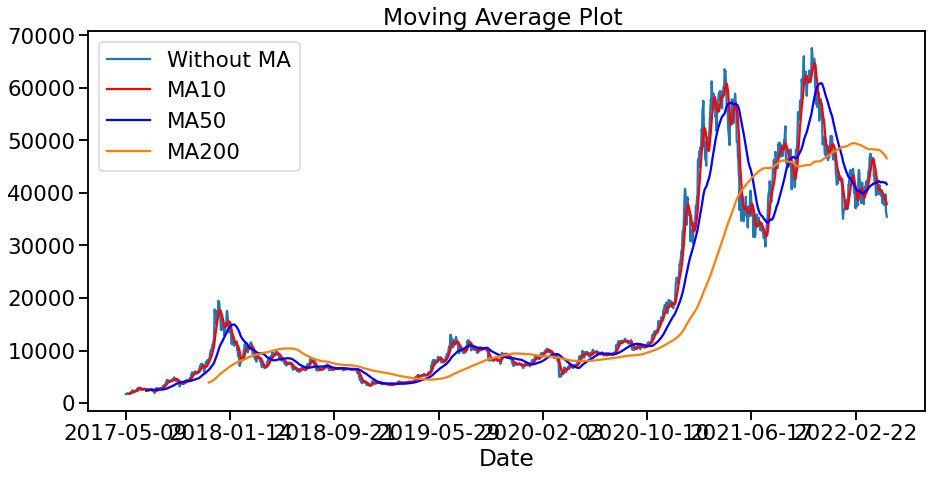

In [671]:
btc_ma['BTC Open'].plot(label='Without MA',figsize=(15,7))
plt.title('Moving Average Plot ')

# 10 days Moving Averages
MA10 = btc_ma['BTC Open'].rolling(10).mean()     # creat column of 10 day MA
MA10.plot(label='MA10',color='r')

# 50 days Moving Averages
MA50 = btc_ma['BTC Open'].rolling(50).mean()     # creat column of 50 day MA
MA50.plot(label='MA50',color='b')

# 200 days Moving Averages
MA200 = btc_ma['BTC Open'].rolling(200).mean()    # creat column of 200 day MA
MA200.plot(label='MA200')


plt.legend()
plt.show()

<a class="anchor" id="btctest">

__`5.1.2 BTC test`__ 
    
</a>

In [520]:
btc_model = BTC.copy()

In [521]:
scaler = MinMaxScaler()

close_price = btc_model['BTC Close'].values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

In [522]:
np.isnan(scaled_close).any()

False

In [523]:
#btc_model

In [524]:
train = btc_model[['Date','BTC AdjClose', 'BTC Close', 'BTC High', 'BTC Low','BTC Open','BTC Volume']]

<class 'pandas.core.frame.DataFrame'>
              BTC Close
Date                   
2017-05-09  1755.359985
2017-05-10  1787.130005
2017-05-11  1848.569946
2017-05-12  1724.239990
2017-05-13  1804.910034


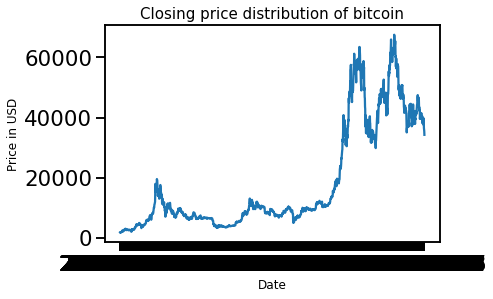

In [525]:
data = train['BTC Close']
Date1 = train['Date']
train1 = train[['Date','BTC Close']]

# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)
print (type(train2))
print (train2.head())

plot.plot(train2)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of bitcoin", fontsize=15)
plot.show()

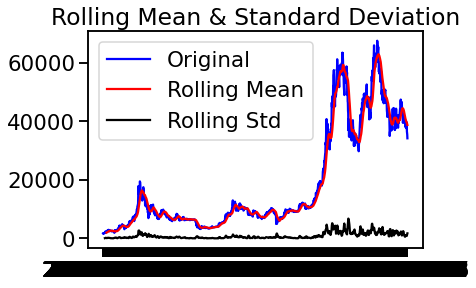

ADF Stastistic: -1.272677
p-value: 0.641578
The graph is non stationary
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [526]:
def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationary")
            break
         else:
            print("The graph is stationary")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = train2['BTC Close']      
test_stationarity(ts)

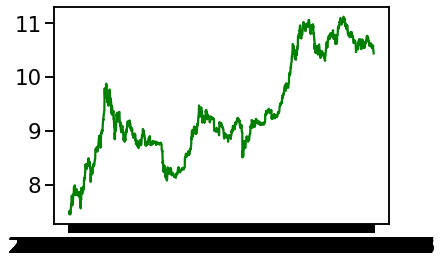

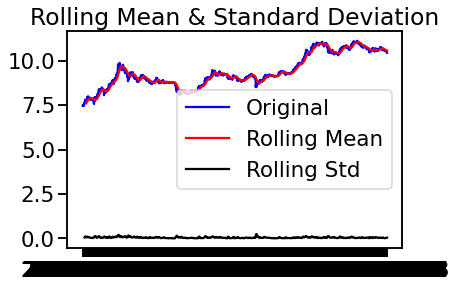

ADF Stastistic: -1.710726
p-value: 0.425595
The graph is non stationary
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [527]:
ts_log = dragon.log(ts)
plot.plot(ts_log,color="green")
plot.show()

test_stationarity(ts_log)

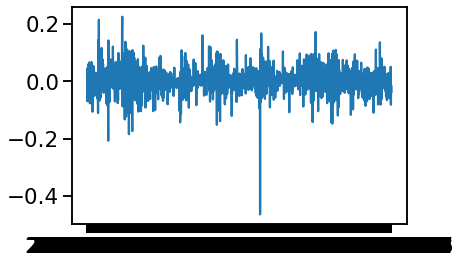

In [528]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.show()

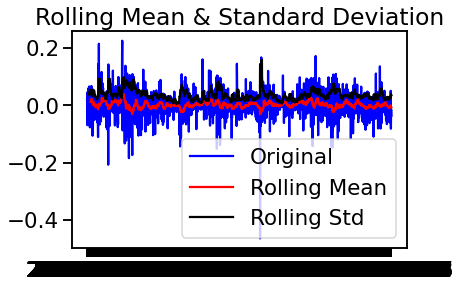

ADF Stastistic: -44.113363
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [529]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

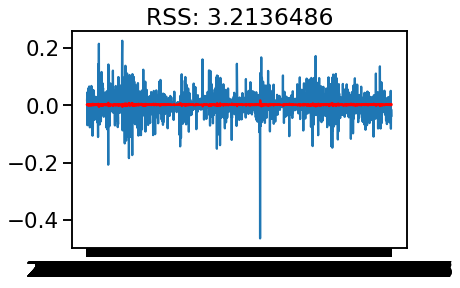

In [533]:
#Auto Regressive Model
#Auto regressive model is a time series forecasting model where current values are dependent on past values.

model = ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

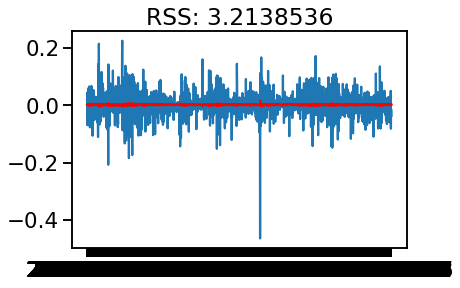

In [534]:
# Moving Average Model
#In moving average model the series is dependent on past error terms.


model = ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_MA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plot.show()

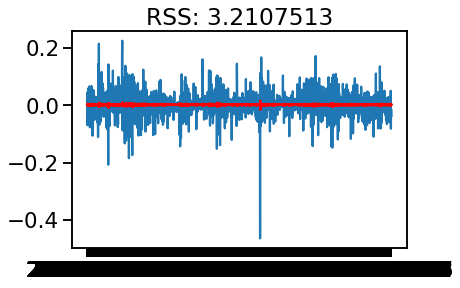

In [535]:
#Auto Regressive Integrated Moving Average Model
#It is a combination of both AR and MA models. It makes the time series stationary by itself through 
#the process of differencing. Therefore differencing need not be done explicitly for ARIMA model

model = ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

ARIMA model is the one with the lowest RSS, therefore is the best model and the one we are going to choose between the 3 models.

Printing Predicted vs Expected Values...


predicted = 37775.617111,   expected = 38138.179687,   error = 0.950655  %
predicted = 38129.715502,   expected = 37917.601562,   error = 0.559408  %
predicted = 37920.131397,   expected = 38483.125000,   error = 1.462962  %
predicted = 38440.783577,   expected = 38743.273437,   error = 0.780755  %
predicted = 38763.384839,   expected = 36952.984375,   error = 4.899200  %
predicted = 37004.446439,   expected = 37154.601562,   error = 0.404136  %
predicted = 37063.709948,   expected = 41500.875000,   error = 10.691739  %
predicted = 41329.802670,   expected = 41441.164063,   error = 0.268722  %
predicted = 41559.853025,   expected = 42412.433594,   error = 2.010214  %
predicted = 42321.863660,   expected = 43840.285156,   error = 3.463530  %
predicted = 43829.667835,   expected = 44118.445313,   error = 0.654550  %
predicted = 44338.030662,   expected = 44338.796875,   error = 0.001728  %
predicted = 44454.393747,   expected = 43565.113281,   e

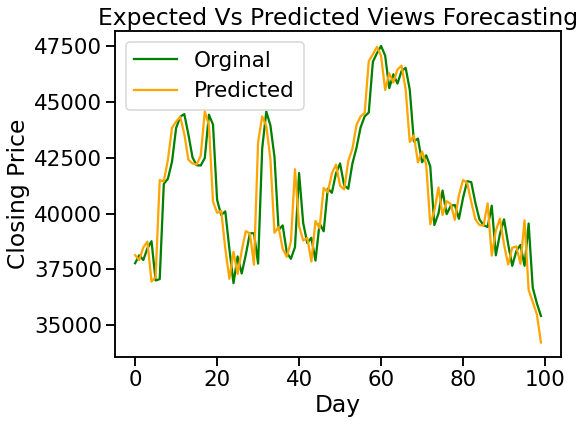

In [537]:
size = int(len(ts_log)-100)


# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. 
#We have the expected value in the test set therefore we calculate the error between predicted and expected value 

for t in range(len(test_arima)):
    model = smapi.tsa.arima.ARIMA(history, order=(7, 0, 1))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))

    
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

In [538]:
print("BTC ARIMA TEST - R2 score =" , r2_score(originals, predictions), "for 100 days test") #for 100 days

BTC ARIMA TEST - R2 score = 0.7656160879066398 for 100 days test


In [539]:
MSE = mean_squared_error(originals, predictions)
RMSE = math.sqrt(MSE)
print("BTC Root Mean Square Error:", RMSE)

BTC Root Mean Square Error: 1391.9381915524154


<a class="anchor" id="adatest">

__`5.1.3 ADA test`__ 
    
</a>

In [541]:
ada_model = ADA.copy()

In [542]:
scaler = MinMaxScaler()
close_price = ada_model['ADA Close'].values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

In [543]:
np.isnan(scaled_close).any()

False

In [544]:
train = ada_model[['Date','ADA AdjClose', 'ADA Close', 'ADA High', 'ADA Low','ADA Open','ADA Volume']]

In [545]:
data = train['ADA Close']
Date1 = train['Date']
train1 = train[['Date','ADA Close']]

train2 = train1.set_index('Date')
train2.sort_index(inplace=True)

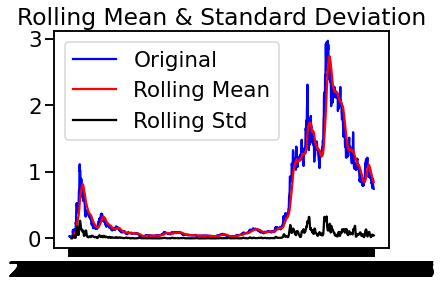

ADF Stastistic: -1.773855
p-value: 0.393517
The graph is non stationary
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [546]:
ts = train2['ADA Close']      
test_stationarity(ts)

In [547]:
ts_log = dragon.log(ts)

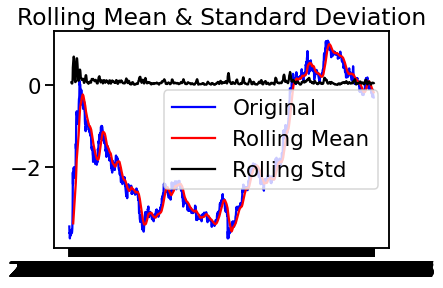

ADF Stastistic: -1.445967
p-value: 0.560052
The graph is non stationary
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [548]:
test_stationarity(ts_log)

In [549]:
ts_log_diff = ts_log - ts_log.shift()

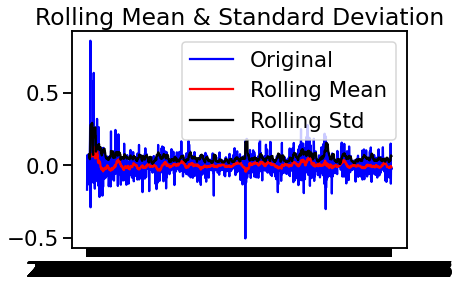

ADF Stastistic: -7.276555
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [550]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [551]:
#Auto Regressive Model
model = smapi.tsa.ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('ADA: AR -', 'RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit(disp=-1)  
print('ADA: MA -','RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

#Auto Regressive Integrated Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('ADA: ARIMA -','RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

ADA: AR - RSS: 7.9489905
ADA: MA - RSS: 7.9494405
ADA: ARIMA - RSS: 7.8125542


Mean Error in Predicting Test Case Articles : 3.416179  %


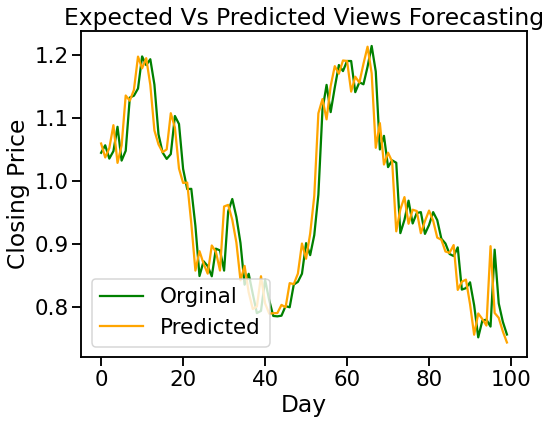

In [552]:
size = int(len(ts_log)-100)


# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

#print('Printing Predicted vs Expected Values...')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. 
#We have the expected value in the test set therefore we calculate the error between predicted and expected value 

for t in range(len(test_arima)):
    model = smapi.tsa.arima.ARIMA(history, order=(7, 0, 1))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    #print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))

    
    
# After iterating over whole test set the overall mean error is calculated.   
print('Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

In [553]:
print("ADA ARIMA TEST - R2 score =" , r2_score(originals, predictions), "for 100 days test") #for 100 days

ADA ARIMA TEST - R2 score = 0.8961404041567762 for 100 days test


In [554]:
MSE = mean_squared_error(originals, predictions)
RMSE = math.sqrt(MSE)
print("ADA Root Mean Square Error:", RMSE)

ADA Root Mean Square Error: 0.043309210083157725


<a class="anchor" id="atomtest">

__`5.1.4 ATOM test`__ 
    
</a>

In [556]:
atom_model = ATOM.copy()

In [557]:
scaler = MinMaxScaler()
close_price = atom_model['ATOM Close'].values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

In [558]:
np.isnan(scaled_close).any()

False

In [559]:
train = atom_model[['Date','ATOM AdjClose', 'ATOM Close', 'ATOM High', 'ATOM Low','ATOM Open','ATOM Volume']]

In [560]:
data = train['ATOM Close']
Date1 = train['Date']
train1 = train[['Date','ATOM Close']]

# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)

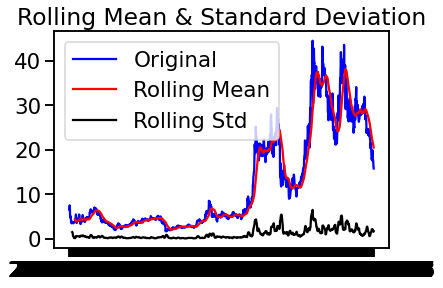

ADF Stastistic: -1.429651
p-value: 0.567981
The graph is non stationary
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [561]:
ts = train2['ATOM Close']      
test_stationarity(ts)

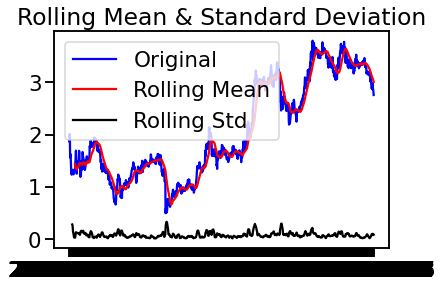

ADF Stastistic: -1.154147
p-value: 0.693003
The graph is non stationary
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [562]:
ts_log = dragon.log(ts)
test_stationarity(ts_log)

In [563]:
ts_log_diff = ts_log - ts_log.shift()

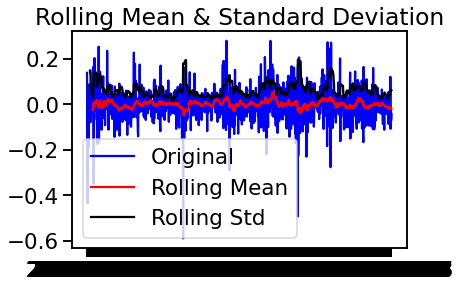

ADF Stastistic: -15.388022
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [564]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [565]:
#Auto Regressive Model
model = smapi.tsa.ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('ATOM: AR -', 'RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit(disp=-1)  
print('ATOM: MA -','RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

#Auto Regressive Integrated Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('ATOM: ARIMA -','RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

ATOM: AR - RSS: 5.9980772
ATOM: MA - RSS: 5.9955725
ATOM: ARIMA - RSS: 5.9928361


Mean Error in Predicting Test Case Articles : 3.960450  %


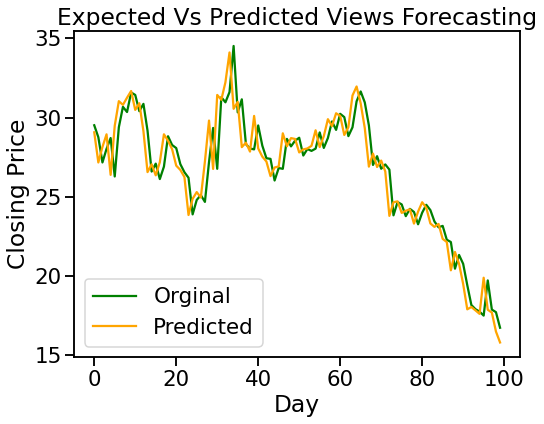

In [566]:
size = int(len(ts_log)-100)


# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

#print('Printing Predicted vs Expected Values...')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. 
#We have the expected value in the test set therefore we calculate the error between predicted and expected value 

for t in range(len(test_arima)):
    model = smapi.tsa.arima.ARIMA(history, order=(7, 0, 1))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    #print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))

    
    
# After iterating over whole test set the overall mean error is calculated.   
print('Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

In [567]:
print("ATOM ARIMA TEST - R2 score =" , r2_score(originals, predictions), "for 100 days test") #for 100 days

ATOM ARIMA TEST - R2 score = 0.8742884497120333 for 100 days test


In [568]:
MSE = mean_squared_error(originals, predictions)
RMSE = math.sqrt(MSE)
print("ATOM Root Mean Square Error:", RMSE)

ATOM Root Mean Square Error: 1.4013150500479468


<a class="anchor" id="avaxtest">

__`5.1.5 AVAX test`__ 
    
</a>

In [570]:
avax_model = AVAX.copy()

In [571]:
scaler = MinMaxScaler()
close_price = avax_model['AVAX Close'].values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

In [572]:
np.isnan(scaled_close).any()

False

In [573]:
train = avax_model[['Date','AVAX AdjClose', 'AVAX Close', 'AVAX High', 'AVAX Low','AVAX Open','AVAX Volume']]

In [574]:
data = train['AVAX Close']
Date1 = train['Date']
train1 = train[['Date','AVAX Close']]

# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)

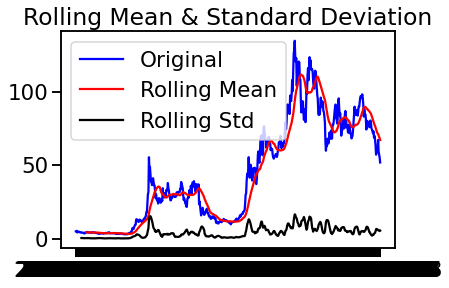

ADF Stastistic: -1.561142
p-value: 0.503078
The graph is non stationary
Critical values:
	1%: -3.442 
	5%: -2.866 
	10%: -2.569 


In [575]:
ts = train2['AVAX Close']      
test_stationarity(ts)

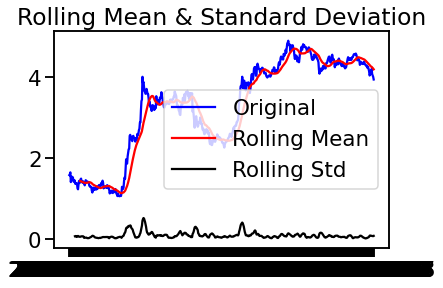

ADF Stastistic: -1.578210
p-value: 0.494529
The graph is non stationary
Critical values:
	1%: -3.441 
	5%: -2.866 
	10%: -2.569 


In [576]:
ts_log = dragon.log(ts)
test_stationarity(ts_log)

In [577]:
ts_log_diff = ts_log - ts_log.shift()

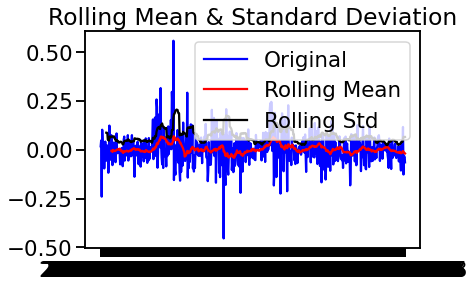

ADF Stastistic: -12.208243
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.441 
	5%: -2.866 
	10%: -2.569 


In [578]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [579]:
#Auto Regressive Model
model = smapi.tsa.ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('AVAX: AR -', 'RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit(disp=-1)  
print('AVAX: MA -','RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

#Auto Regressive Integrated Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('AVAX: ARIMA -','RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

AVAX: AR - RSS: 3.8577835
AVAX: MA - RSS: 3.8577891
AVAX: ARIMA - RSS: 3.8499016


Mean Error in Predicting Test Case Articles : 4.297483  %


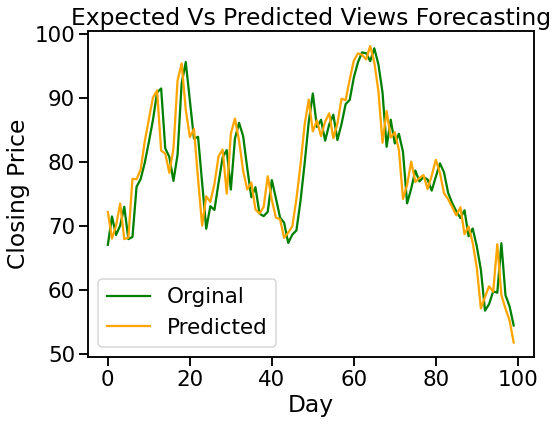

In [580]:
size = int(len(ts_log)-100)


# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

#print('Printing Predicted vs Expected Values...')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. 
#We have the expected value in the test set therefore we calculate the error between predicted and expected value 

for t in range(len(test_arima)):
    model = smapi.tsa.arima.ARIMA(history, order=(7, 0, 1))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    #print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))

    
    
# After iterating over whole test set the overall mean error is calculated.   
print('Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

In [581]:
print("AVAX ARIMA TEST - R2 score =" , r2_score(originals, predictions), "for 100 days test") #for 100 days

AVAX ARIMA TEST - R2 score = 0.8352517483492334 for 100 days test


In [582]:
MSE = mean_squared_error(originals, predictions)
RMSE = math.sqrt(MSE)
print("AVAX Root Mean Square Error:", RMSE)

AVAX Root Mean Square Error: 4.074188763909373


<a class="anchor" id="axstest">

__`5.1.6 AXS test`__ 
    
</a>

In [584]:
axs_model = AXS.copy()

In [585]:
scaler = MinMaxScaler()
close_price = axs_model['AXS Close'].values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

In [586]:
np.isnan(scaled_close).any()

False

In [587]:
train = axs_model[['Date','AXS AdjClose', 'AXS Close', 'AXS High', 'AXS Low','AXS Open','AXS Volume']]

In [588]:
data = train['AXS Close']
Date1 = train['Date']
train1 = train[['Date','AXS Close']]

# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)

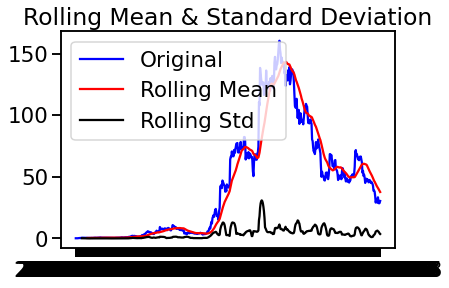

ADF Stastistic: -1.250240
p-value: 0.651619
The graph is non stationary
Critical values:
	1%: -3.443 
	5%: -2.867 
	10%: -2.570 


In [589]:
ts = train2['AXS Close']      
test_stationarity(ts)

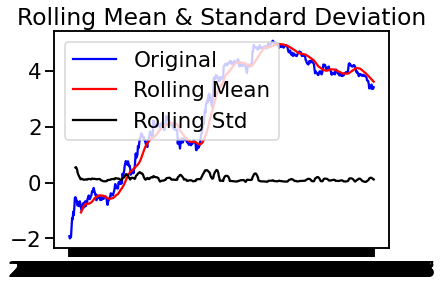

ADF Stastistic: -1.878750
p-value: 0.342123
The graph is non stationary
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


In [590]:
ts_log = dragon.log(ts)
test_stationarity(ts_log)

In [591]:
ts_log_diff = ts_log - ts_log.shift()

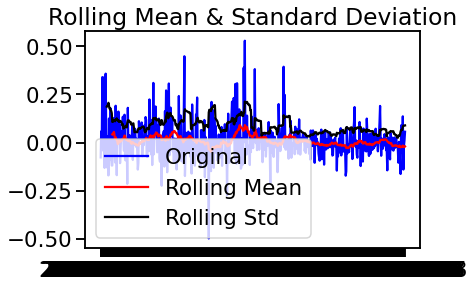

ADF Stastistic: -7.731009
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


In [592]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [593]:
#Auto Regressive Model
model = smapi.tsa.ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('AXS: AR -', 'RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit(disp=-1)  
print('AXS: MA -','RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

#Auto Regressive Integrated Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('AXS: ARIMA -','RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

AXS: AR - RSS: 5.5302994
AXS: MA - RSS: 5.5303460
AXS: ARIMA - RSS: 5.4977334


Mean Error in Predicting Test Case Articles : 4.700269  %


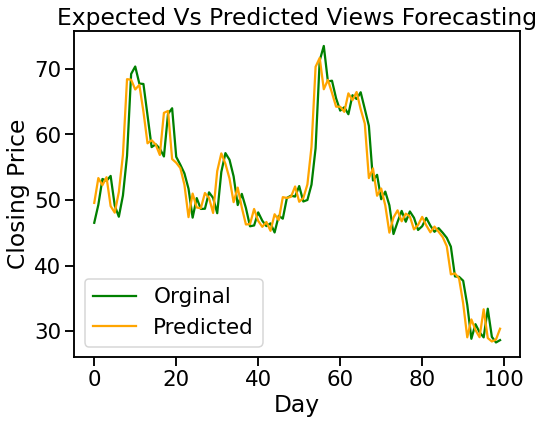

In [594]:
size = int(len(ts_log)-100)


# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

#print('Printing Predicted vs Expected Values...')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. 
#We have the expected value in the test set therefore we calculate the error between predicted and expected value 

for t in range(len(test_arima)):
    model = smapi.tsa.arima.ARIMA(history, order=(7, 0, 1))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    #print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))

    
    
# After iterating over whole test set the overall mean error is calculated.   
print('Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

In [595]:
print("AXS ARIMA TEST - R2 score =" , r2_score(originals, predictions), "for 100 days test") #for 100 days

AXS ARIMA TEST - R2 score = 0.8974439921138726 for 100 days test


In [596]:
MSE = mean_squared_error(originals, predictions)
RMSE = math.sqrt(MSE)
print("AXS Root Mean Square Error:", RMSE)

AXS Root Mean Square Error: 3.275291053745377


<a class="anchor" id="ethtest">

__`5.1.7 ETH test`__ 
    
</a>

In [598]:
eth_model = ETH.copy()

In [599]:
scaler = MinMaxScaler()
close_price = eth_model['ETH Close'].values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

In [600]:
np.isnan(scaled_close).any()

False

In [601]:
train = eth_model[['Date','ETH AdjClose', 'ETH Close', 'ETH High', 'ETH Low','ETH Open','ETH Volume']]

In [602]:
data = train['ETH Close']
Date1 = train['Date']
train1 = train[['Date','ETH Close']]

# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)

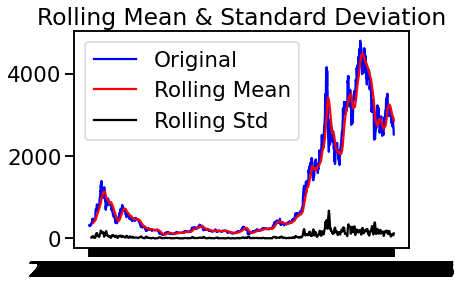

ADF Stastistic: -0.913483
p-value: 0.783500
The graph is non stationary
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [603]:
ts = train2['ETH Close']      
test_stationarity(ts)

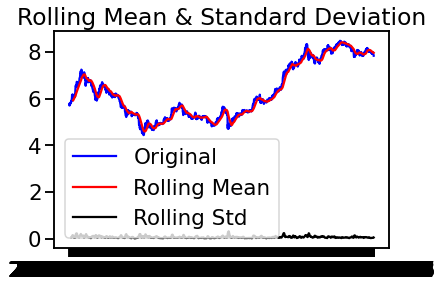

ADF Stastistic: -0.595325
p-value: 0.872035
The graph is non stationary
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [604]:
ts_log = dragon.log(ts)
test_stationarity(ts_log)

In [605]:
ts_log_diff = ts_log - ts_log.shift()

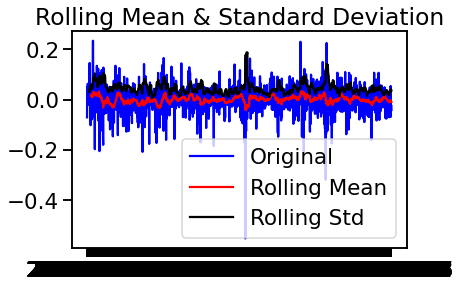

ADF Stastistic: -12.049454
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [606]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [607]:
#Auto Regressive Model
model = smapi.tsa.ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('ETH: AR -', 'RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit(disp=-1)  
print('ETH: MA -','RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

#Auto Regressive Integrated Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('ETH: ARIMA -','RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

ETH: AR - RSS: 4.3785708
ETH: MA - RSS: 4.3795263
ETH: ARIMA - RSS: 4.3643230


Mean Error in Predicting Test Case Articles : 2.917704  %


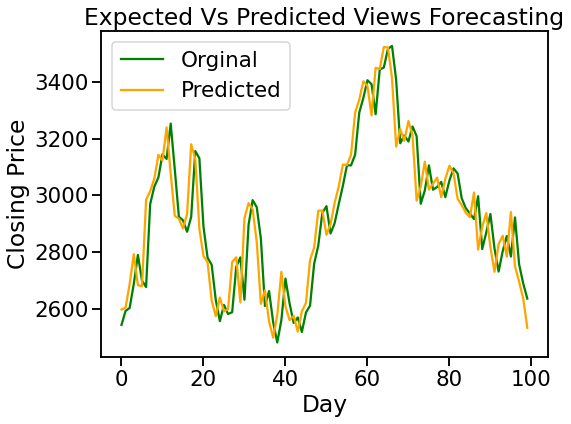

In [608]:
size = int(len(ts_log)-100)


# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

#print('Printing Predicted vs Expected Values...')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. 
#We have the expected value in the test set therefore we calculate the error between predicted and expected value 

for t in range(len(test_arima)):
    model = smapi.tsa.arima.ARIMA(history, order=(7, 0, 1))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    #print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))

    
    
# After iterating over whole test set the overall mean error is calculated.   
print('Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

In [609]:
print("ETH ARIMA TEST - R2 score =" , r2_score(originals, predictions), "for 100 days test") #for 100 days

ETH ARIMA TEST - R2 score = 0.8195605045995487 for 100 days test


In [610]:
MSE = mean_squared_error(originals, predictions)
RMSE = math.sqrt(MSE)
print("ETH Root Mean Square Error:", RMSE)

ETH Root Mean Square Error: 107.34970544334483


<a class="anchor" id="linktest">

__`5.1.8 LINK test`__ 
    
</a>

In [612]:
link_model = LINK.copy()

In [613]:
scaler = MinMaxScaler()
close_price = link_model['LINK Close'].values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

In [614]:
np.isnan(scaled_close).any()

False

In [615]:
train = link_model[['Date','LINK AdjClose', 'LINK Close', 'LINK High', 'LINK Low','LINK Open','LINK Volume']]

In [616]:
data = train['LINK Close']
Date1 = train['Date']
train1 = train[['Date','LINK Close']]

# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)

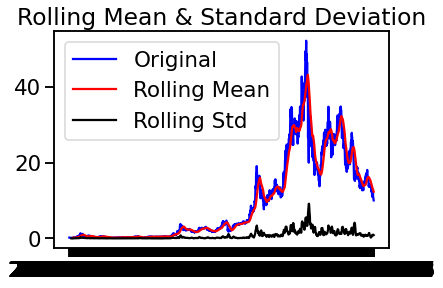

ADF Stastistic: -1.638338
p-value: 0.463129
The graph is non stationary
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [617]:
ts = train2['LINK Close']      
test_stationarity(ts)

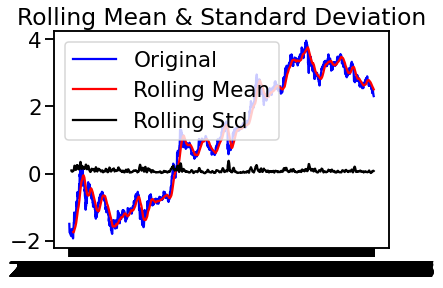

ADF Stastistic: -1.519347
p-value: 0.523920
The graph is non stationary
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [618]:
ts_log = dragon.log(ts)
test_stationarity(ts_log)

In [619]:
ts_log_diff = ts_log - ts_log.shift()

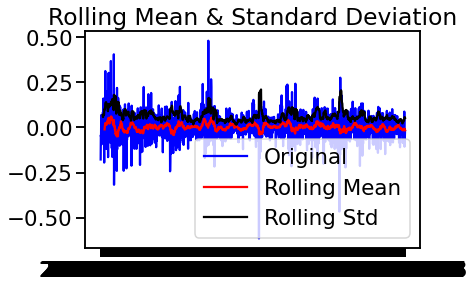

ADF Stastistic: -18.835714
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [620]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [621]:
#Auto Regressive Model
model = smapi.tsa.ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('LINK: AR -', 'RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit(disp=-1)  
print('LINK: MA -','RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

#Auto Regressive Integrated Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('LINK: ARIMA -','RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

LINK: AR - RSS: 8.6718531
LINK: MA - RSS: 8.6744423
LINK: ARIMA - RSS: 8.6620650


Mean Error in Predicting Test Case Articles : 3.590342  %


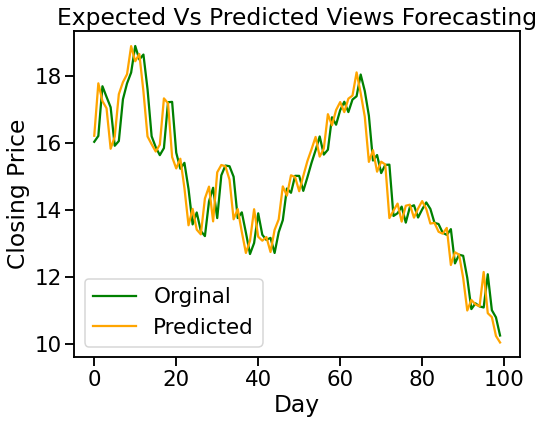

In [622]:
size = int(len(ts_log)-100)


# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

#print('Printing Predicted vs Expected Values...')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. 
#We have the expected value in the test set therefore we calculate the error between predicted and expected value 

for t in range(len(test_arima)):
    model = smapi.tsa.arima.ARIMA(history, order=(7, 0, 1))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    #print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))

    
    
# After iterating over whole test set the overall mean error is calculated.   
print('Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

In [623]:
print("LINK ARIMA TEST - R2 score =" , r2_score(originals, predictions), "for 100 days test") #for 100 days

LINK ARIMA TEST - R2 score = 0.8858474296484157 for 100 days test


In [624]:
MSE = mean_squared_error(originals, predictions)
RMSE = math.sqrt(MSE)
print("LINK Root Mean Square Error:", RMSE)

LINK Root Mean Square Error: 0.672289415990841


<a class="anchor" id="lunatest">

__`5.1.9 LUNA1 test`__ 
    
</a>

In [713]:
na_model = LUNA1.copy()
na_model

Date  LUNA1 AdjClose  LUNA1 Close  LUNA1 High  LUNA1 Low  \
808   2019-07-26        1.327436     1.327436    1.833167   1.261695   
809   2019-07-27        1.310566     1.310566    1.402898   1.221938   
810   2019-07-28        1.272989     1.272989    1.368595   1.236858   
811   2019-07-29        1.294661     1.294661    1.375941   1.175443   
812   2019-07-30        1.294193     1.294193    1.374333   1.266484   
...          ...             ...          ...         ...        ...   
1821  2022-05-04       86.172264    86.172264   87.956352  82.267265   
1822  2022-05-05       82.580406    82.580406   87.777588  79.330872   
1823  2022-05-06       77.464806    77.464806   82.936325  77.432007   
1824  2022-05-07       68.249123    68.249123   77.494347  63.838245   
1825  2022-05-08       64.176682    64.176682   68.271729  59.578342   

      LUNA1 Open  LUNA1 Volume  
808     1.704222  1.208858e+07  
809     1.327436  6.033446e+06  
810     1.310566  1.643709e+06  
811     1.262270  3.966802e+06  
812     1.294435  1.820705e+06  
...          ...           ...  
1821   82.584396  1.941975e+09  
1822   86.159637  2.276428e+09  
1823   82.551933  2.178574e+09  
1824   77.465630  3.054300e+09  
1825   68.271729  5.255014e+09  

[1018 rows x 7 columns]

In [714]:
scaler = MinMaxScaler()
close_price = na_model['LUNA1 Close'].values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

In [715]:
np.isnan(scaled_close).any()

False

In [716]:
train = na_model[['Date','LUNA1 AdjClose', 'LUNA1 Close', 'LUNA1 High', 'LUNA1 Low','LUNA1 Open','LUNA1 Volume']]

In [717]:
data = train['LUNA1 Close']
Date1 = train['Date']
train1 = train[['Date','LUNA1 Close']]

# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)

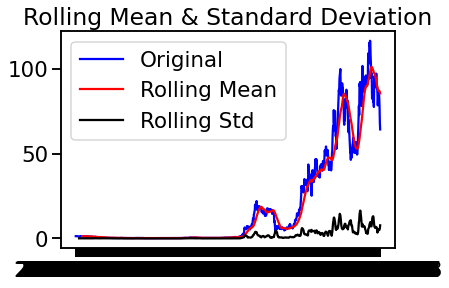

ADF Stastistic: -0.790743
p-value: 0.821826
The graph is non stationary
Critical values:
	1%: -3.437 
	5%: -2.864 
	10%: -2.568 


In [720]:
ts = train2['LUNA1 Close']      
test_stationarity(ts)

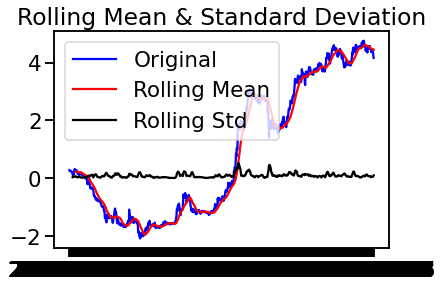

ADF Stastistic: -0.206379
p-value: 0.937757
The graph is non stationary
Critical values:
	1%: -3.437 
	5%: -2.864 
	10%: -2.568 


In [721]:
ts_log = dragon.log(ts)
test_stationarity(ts_log)

In [722]:
ts_log_diff = ts_log - ts_log.shift()

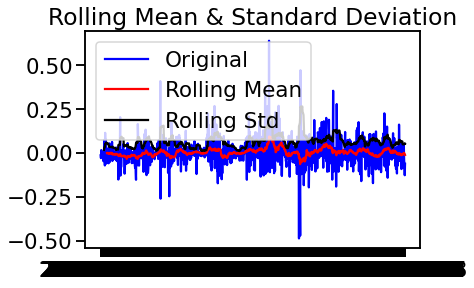

ADF Stastistic: -6.765467
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.437 
	5%: -2.864 
	10%: -2.568 


In [723]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [724]:
#Auto Regressive Model
model = smapi.tsa.ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('LUNA1: AR -', 'RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit(disp=-1)  
print('LUNA1: MA -','RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

#Auto Regressive Integrated Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('LUNA1: ARIMA -','RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

LUNA1: AR - RSS: 6.1946530
LUNA1: MA - RSS: 6.1950048
LUNA1: ARIMA - RSS: 6.1784679


Mean Error in Predicting Test Case Articles : 4.999249  %


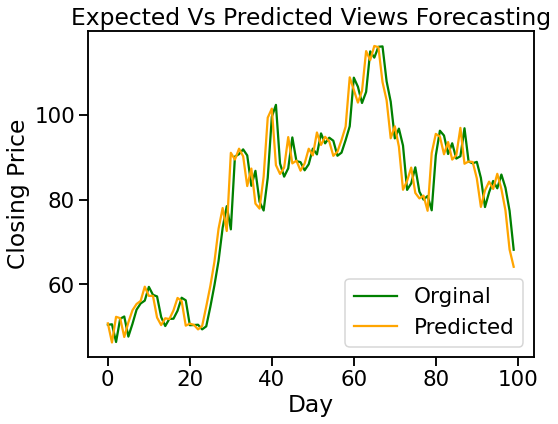

In [727]:
size = int(len(ts_log)-100)


# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

#print('Printing Predicted vs Expected Values...')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. 
#We have the expected value in the test set therefore we calculate the error between predicted and expected value 

for t in range(len(test_arima)):
    model = smapi.tsa.arima.ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    #print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))

    
    
# After iterating over whole test set the overall mean error is calculated.   
print('Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

In [728]:
print("LUNA1 ARIMA TEST - R2 score =" , r2_score(originals, predictions), "for 100 days test") #for 100 days

LUNA1 ARIMA TEST - R2 score = 0.9214500570998383 for 100 days test


In [729]:
MSE = mean_squared_error(originals, predictions)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:", RMSE)

Root Mean Square Error: 5.270746088048792


<a class="anchor" id="matictest">

__`5.1.10 MATIC test`__ 
    
</a>

In [420]:
matic_model = MATIC.copy()

In [424]:
scaler = MinMaxScaler()
close_price = matic_model['MATIC Close'].values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

In [425]:
np.isnan(scaled_close).any()

False

In [426]:
train = matic_model[['Date','MATIC AdjClose', 'MATIC Close', 'MATIC High', 'MATIC Low','MATIC Open','MATIC Volume']]

In [427]:
data = train['MATIC Close']
Date1 = train['Date']
train1 = train[['Date','MATIC Close']]

# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)

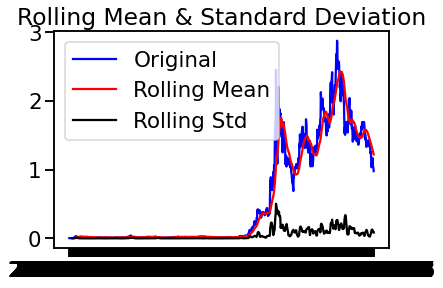

ADF Stastistic: -1.261966
p-value: 0.646388
The graph is non stationary
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [428]:
ts = train2['MATIC Close']      
test_stationarity(ts)

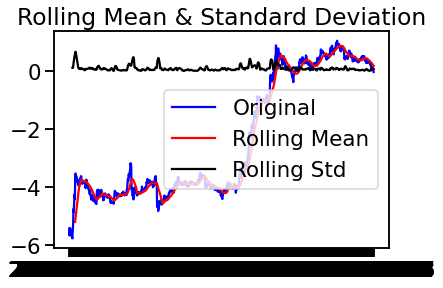

ADF Stastistic: -1.052333
p-value: 0.733702
The graph is non stationary
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [429]:
ts_log = dragon.log(ts)
test_stationarity(ts_log)

In [430]:
ts_log_diff = ts_log - ts_log.shift()

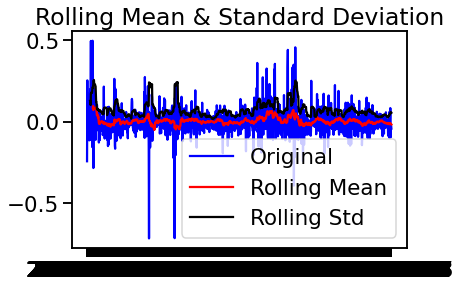

ADF Stastistic: -15.140694
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [431]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [432]:
#Auto Regressive Model
model = smapi.tsa.ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('MATIC: AR -', 'RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit(disp=-1)  
print('MATIC: MA -','RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

#Auto Regressive Integrated Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('MATIC: ARIMA -','RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

MATIC: AR - RSS: 8.5056852
MATIC: MA - RSS: 8.5064595
MATIC: ARIMA - RSS: 8.4207882


Mean Error in Predicting Test Case Articles : 3.688324  %


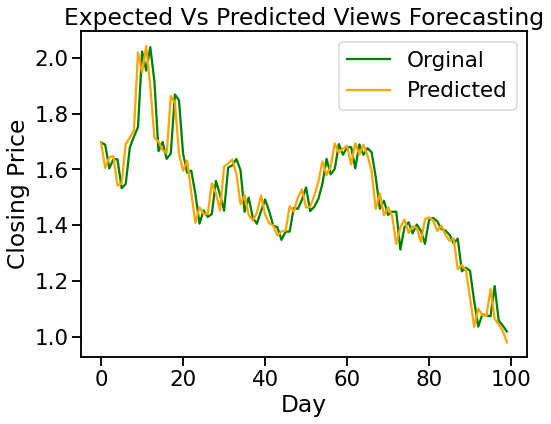

In [433]:
size = int(len(ts_log)-100)


# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

#print('Printing Predicted vs Expected Values...')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. 
#We have the expected value in the test set therefore we calculate the error between predicted and expected value 

for t in range(len(test_arima)):
    model = smapi.tsa.arima.ARIMA(history, order=(7, 0, 1))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    #print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))

    
    
# After iterating over whole test set the overall mean error is calculated.   
print('Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

In [434]:
print("MATIC ARIMA TEST - R2 score =" , r2_score(originals, predictions), "for 100 days test") #for 100 days

MATIC ARIMA TEST - R2 score = 0.8735758960249941 for 100 days test


In [435]:
MSE = mean_squared_error(originals, predictions)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:", RMSE)

Root Mean Square Error: 0.07419578195283076


<a class="anchor" id="soltest">

__`5.1.11 SOL test`__ 
    
</a>

In [437]:
sol_model = SOL.copy()

In [438]:
scaler = MinMaxScaler()
close_price = sol_model['SOL Close'].values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

In [439]:
np.isnan(scaled_close).any()

False

In [440]:
train = sol_model[['Date','SOL AdjClose', 'SOL Close', 'SOL High', 'SOL Low','SOL Open','SOL Volume']]

In [441]:
data = train['SOL Close']
Date1 = train['Date']
train1 = train[['Date','SOL Close']]

# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)

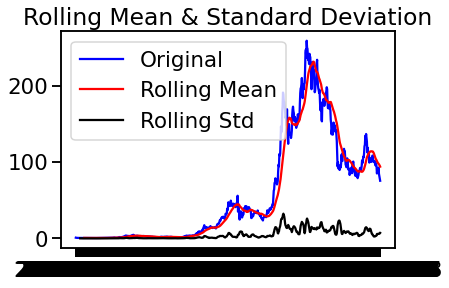

ADF Stastistic: -1.320830
p-value: 0.619590
The graph is non stationary
Critical values:
	1%: -3.439 
	5%: -2.865 
	10%: -2.569 


In [442]:
ts = train2['SOL Close']      
test_stationarity(ts)

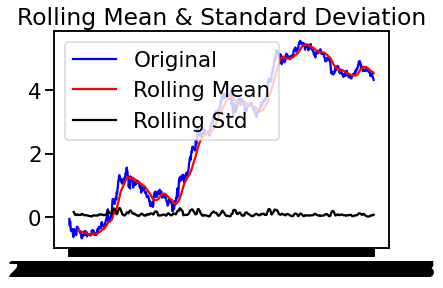

ADF Stastistic: -1.491832
p-value: 0.537548
The graph is non stationary
Critical values:
	1%: -3.439 
	5%: -2.865 
	10%: -2.569 


In [443]:
ts_log = dragon.log(ts)
test_stationarity(ts_log)

In [444]:
ts_log_diff = ts_log - ts_log.shift()

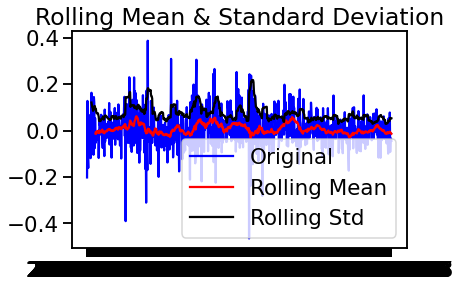

ADF Stastistic: -5.766348
p-value: 0.000001
The graph is stationary
Critical values:
	1%: -3.439 
	5%: -2.865 
	10%: -2.569 


In [445]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [446]:
#Auto Regressive Model
model = smapi.tsa.ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('SOL: AR -', 'RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit(disp=-1)  
print('SOL: MA -','RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

#Auto Regressive Integrated Moving Average Model
model = smapi.tsa.ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
print('SOL: ARIMA -','RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

SOL: AR - RSS: 5.0084985
SOL: MA - RSS: 5.0092555
SOL: ARIMA - RSS: 5.0083062


Mean Error in Predicting Test Case Articles : 4.098042  %


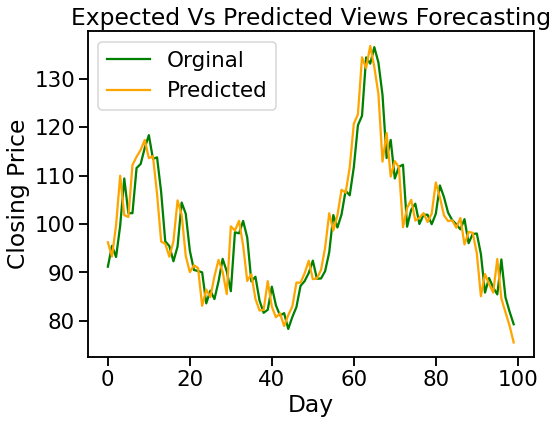

In [447]:
size = int(len(ts_log)-100)


# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

#print('Printing Predicted vs Expected Values...')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. 
#We have the expected value in the test set therefore we calculate the error between predicted and expected value 

for t in range(len(test_arima)):
    model = smapi.tsa.arima.ARIMA(history, order=(7, 0, 1))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    #print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))

    
    
# After iterating over whole test set the overall mean error is calculated.   
print('Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

In [448]:
print("SOL ARIMA TEST - R2 score =" , r2_score(originals, predictions), "for 100 days test") #for 100 days

SOL ARIMA TEST - R2 score = 0.8438732158444503 for 100 days test


In [449]:
MSE = mean_squared_error(originals, predictions)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:", RMSE)

Root Mean Square Error: 5.16136957559324


<a class="anchor" id="lstm">

__`5.2. LSTM`__ 
    
</a>

In [800]:
def prepare_data(dataset, currency):
    dataset = dataset.set_index('Date')
    dataset = dataset.filter([currency + ' Close'])
    data = dataset.values
    
    return data, dataset

In [801]:
def scale_data(dataset):
    scalerMATIC = MinMaxScaler(feature_range=(0,1))
    scaled_data = scalerMATIC.fit_transform(data)
    
    return scaled_data, scalerMATIC

In [802]:
def train_test_split(scaled_data, data, train_prop, time_range):
    train_data_len = math.ceil(len(data)*train_prop)
    
    # Create the training data set
    train_data = scaled_data[0:train_data_len,:]

    # Split into x_train and y_train
    x_train = []
    y_train = []

    for i in range(time_range, len(train_data)):
        x_train.append(train_data[i-time_range:i,0])
        y_train.append(train_data[i,0])
        
    # Convert the x_train and y_train into arrays
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    # Reshape x_train
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    
    # Create the test set
    test_data = scaled_data[train_data_len - time_range:,:]

    # Create x_test and y_test
    x_test = []
    y_test = data[train_data_len:,:]

    for i in range(time_range, len(test_data)):
        x_test.append(test_data[i-time_range:i,0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    return x_train, y_train, x_test, y_test, train_data, test_data, train_data_len

In [803]:
def modelling(model, x_train):
    
    if model == 'LSTM':
        model20 = Sequential()
        model20.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
        model20.add(LSTM(units=50, return_sequences=False))
        model20.add(Dense(units=25))
        model20.add(Dense(units=1))
        
        model20.compile(optimizer='adam', loss='mean_squared_error')
    
    elif model == 'GRU':
        model30 = Sequential()
        model30.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
        model30.add(Dropout(0.2))
        model30.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
        model30.add(Dropout(0.2))
        model30.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
        model30.add(Dropout(0.2))
        model30.add(GRU(units=50, activation='tanh'))
        model30.add(Dropout(0.2))
        model30.add(Dense(units=1))

        model30.compile(optimizer='adam', loss='mean_squared_error')
        
        
    return model30

In [804]:
def fit_predict(model30, x_train, y_train, x_test, y_test, epochs, scaler):

    model30.fit(x_train, y_train, batch_size=1, epochs=epochs)
    predictions = model30.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    
    print('Root Mean Squared Error: ', np.sqrt(np.mean(predictions-y_test)**2))
    print('Mean Squared Error: ', mean_squared_error(y_test,predictions))
    print('Mean Absolute Error: ', mean_absolute_error(y_test,predictions))
    print('R2: ', r2_score(y_test,predictions))
    
    return predictions

In [805]:
def plot_results(data, train_data_len, predictions, currency):

    train = data[:train_data_len]
    test = data[train_data_len:]
    test['Predictions'] = predictions

    plt.figure(figsize = (16,8))
    plt.title('LSTM Model Results')
    plt.xlabel('Date')
    plt.ylabel('Close Value')
    plt.plot(train[currency +' Close'])
    plt.plot(test[[currency +' Close', 'Predictions']])
    plt.legend(['Train', 'Test', 'Predictions'], loc = 'lower right')
    plt.show()

In [806]:
def predict_values(new_data, currency, time_range, model):
    
    # Get the new data
    new_df = new_data.filter([currency + ' Close'])
    # Get the last x values
    last_days = new_df[-time_range:].values

    # Scale the date
    last_days_scaled = scaler.transform(last_days)

    # Create list
    x_test = []
    x_test.append(last_days_scaled)

    # Covert x_test to array and reshape
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Get the predicted scaled close value
    predict_value = model.predict(x_test)
    predict_value = scaler.inverse_transform(predict_value)
    print(predict_value)

<a class="anchor" id="predictions">

## 6. Prediction for next day values

</a>

In [450]:
bt_c = BTC.copy()
ada_ = ADA.copy()
atom_ = ATOM.copy()
avax_ = AVAX.copy()
axs_ = AXS.copy()
eth_ = ETH.copy()
link_ = LINK.copy()
luna1_ = LUNA1.copy()
matic_ = MATIC.copy()
sol_ = SOL.copy()

In [451]:
series_btc = bt_c[['Date', 'BTC Close']].set_index('Date')
series_ada = ada_[['Date', 'ADA Close']].set_index('Date')
series_atom =atom_[['Date', 'ATOM Close']].set_index('Date')
series_avax =avax_[['Date', 'AVAX Close']].set_index('Date')
series_axs =axs_[['Date', 'AXS Close']].set_index('Date')
series_eth =eth_[['Date', 'ETH Close']].set_index('Date')
series_link = link_[['Date', 'LINK Close']].set_index('Date')
series_luna1 =luna1_[['Date', 'LUNA1 Close']].set_index('Date')
series_matic = matic_[['Date', 'MATIC Close']].set_index('Date')
series_sol =sol_[['Date', 'SOL Close']].set_index('Date')

In [452]:
print(' BTC length:', len(series_btc),'\n',
'ADA length:', len(series_ada),'\n',
'ATOM length:',len(series_atom),'\n',
'AVAX length:',len(series_avax),'\n',
'AXS length:',len(series_axs),'\n',
'ETH length:',len(series_eth),'\n',
'LINK length:',len(series_link),'\n',
'LUNA1 length:',len(series_luna1), '\n',
'MATIC length:',len(series_matic),'\n',
'SOL length:',len(series_sol))

 BTC length: 1826 
 ADA length: 1642 
 ATOM length: 1152 
 AVAX length: 596 
 AXS length: 551 
 ETH length: 1642 
 LINK length: 1642 
 LUNA1 length: 1018 
 MATIC length: 1107 
 SOL length: 759


In [453]:
print(series_btc.head(1),
series_btc.tail(1))

              BTC Close
Date                   
2017-05-09  1755.359985                BTC Close
Date                    
2022-05-08  34226.796875


In [454]:
print(series_ada.head(1),
series_ada.tail(1))

            ADA Close
Date                 
2017-11-09   0.032053             ADA Close
Date                 
2022-05-08   0.744362


In [455]:
print(series_atom.head(1),
series_atom.tail(1))

            ATOM Close
Date                  
2019-03-14    6.526642             ATOM Close
Date                  
2022-05-08   15.785578


In [456]:
print(series_avax.head(1),
series_avax.tail(1))

            AVAX Close
Date                  
2020-07-13    4.896294             AVAX Close
Date                  
2022-05-08   51.730221


In [457]:
print(series_axs.head(1),
series_axs.tail(1))

            AXS Close
Date                 
2020-11-04   0.145949             AXS Close
Date                 
2022-05-08  30.405958


In [458]:
print(series_eth.head(1),
series_eth.tail(1))

             ETH Close
Date                  
2017-11-09  320.884003               ETH Close
Date                   
2022-05-08  2532.283691


In [459]:
print(series_link.head(1),
series_link.tail(1))

            LINK Close
Date                  
2017-11-09    0.223969             LINK Close
Date                  
2022-05-08   10.044308


In [460]:
print(series_luna1.head(1),
series_luna1.tail(1))

            LUNA1 Close
Date                   
2019-07-26     1.327436             LUNA1 Close
Date                   
2022-05-08    64.176682


In [461]:
print(series_matic.head(1),
series_matic.tail(1))

            MATIC Close
Date                   
2019-04-28     0.004421             MATIC Close
Date                   
2022-05-08     0.979784


In [462]:
print(series_sol.head(1),
series_sol.tail(1))

            SOL Close
Date                 
2020-04-10   0.951054             SOL Close
Date                 
2022-05-08  75.536499


<a class="anchor" id="arimapred">

__`6.1. Predictions with ARIMA`__ 
    
</a>

In [464]:
split_point = len(series_btc) - 100
dataset, validation = series_btc[0:split_point], series_btc[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 1726, Validation 100


### Create Functions

In [466]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

In [467]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [468]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

### BTC Forecast with ARIMA

In [470]:
# seasonal difference
X = series_btc['BTC Close'].values
days_test = 100
differenced = difference(X, days_test)

# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()

# print summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1726
Model:                 ARIMA(7, 0, 1)   Log Likelihood              -14957.341
Date:                Mon, 09 May 2022   AIC                          29934.682
Time:                        12:46:00   BIC                          29989.218
Sample:                             0   HQIC                         29954.856
                               - 1726                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2223.3610   3411.801      0.652      0.515   -4463.647    8910.369
ar.L1          0.9206      0.328      2.805      0.005       0.277       1.564
ar.L2          0.0997      0.318      0.313      0.7

In [471]:
forecast = model_fit.forecast()[0]

In [472]:
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_test)

In [473]:
print('Forecast: %f' % forecast)

Forecast: 34387.325522


In [474]:
### FORECAST FUNCTION
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 4
forecast = model_fit.predict(start=start_index, end=end_index)

# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_test)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 34387.325522
Day 2: 33979.576496
Day 3: 34311.100055
Day 4: 34417.124471
Day 5: 32532.949667


### ADA Forecast with ARIMA

In [476]:
split_point = len(series_ada) - 4
dataset, validation = series_ada[0:split_point], series_ada[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 1638, Validation 4


In [477]:
# seasonal difference
X = series_ada['ADA Close'].values
differenced = difference(X, days_test)

# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()

# print summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1542
Model:                 ARIMA(7, 0, 1)   Log Likelihood                1842.469
Date:                Mon, 09 May 2022   AIC                          -3664.938
Time:                        12:46:06   BIC                          -3611.529
Sample:                             0   HQIC                         -3645.069
                               - 1542                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0352      0.522      0.067      0.946      -0.988       1.059
ar.L1          0.2190      0.095      2.295      0.022       0.032       0.406
ar.L2          0.7061      0.078      9.068      0.0

In [478]:
forecast = model_fit.forecast()[0]

In [479]:
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_test)

In [480]:
print('Forecast: %f' % forecast)

Forecast: 0.749818


In [481]:
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 4
forecast = model_fit.predict(start=start_index, end=end_index)

# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_test)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 0.749818
Day 2: 0.714464
Day 3: 0.747729
Day 4: 0.774537
Day 5: 0.721219


### ATOM Forecast with ARIMA

In [483]:
split_point = len(series_atom) - 4
dataset, validation = series_atom[0:split_point], series_atom[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)


# seasonal difference
X = series_atom['ATOM Close'].values
differenced = difference(X, days_test)

# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()

# print summary of fit model
print(model_fit.summary())

Dataset 1148, Validation 4
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1052
Model:                 ARIMA(7, 0, 1)   Log Likelihood               -2106.494
Date:                Mon, 09 May 2022   AIC                           4232.988
Time:                        12:46:10   BIC                           4282.572
Sample:                             0   HQIC                          4251.787
                               - 1052                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5352      2.463      0.623      0.533      -3.293       6.364
ar.L1          1.6338      0.070     23.344      0.000       1.497       1.771
ar.L2         -0.6798    

In [484]:
forecast = model_fit.forecast()[0]
forecast = inverse_difference(X, forecast, days_test)
print('Forecast: %f' % forecast)

Forecast: 15.373604


In [485]:
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 4
forecast = model_fit.predict(start=start_index, end=end_index)

# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_test)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 15.373604
Day 2: 14.199683
Day 3: 15.354923
Day 4: 16.486289
Day 5: 14.384669


### AVAX Forecast with ARIMA

In [487]:
split_point = len(series_avax) - 4
dataset, validation = series_avax[0:split_point], series_avax[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)


# seasonal difference
X = series_avax['AVAX Close'].values
differenced = difference(X, days_test)

# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()

# print summary of fit model
print(model_fit.summary())

Dataset 592, Validation 4
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  496
Model:                 ARIMA(7, 0, 1)   Log Likelihood               -1560.804
Date:                Mon, 09 May 2022   AIC                           3141.607
Time:                        12:46:12   BIC                           3183.673
Sample:                             0   HQIC                          3158.119
                                - 496                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9325     14.567      1.025      0.305     -13.617      43.482
ar.L1          0.7152      0.274      2.608      0.009       0.178       1.253
ar.L2          0.3026     

In [488]:
forecast = model_fit.forecast()[0]
forecast = inverse_difference(X, forecast, days_test)
print('Forecast: %f' % forecast)

Forecast: 57.052913


In [489]:
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 4
forecast = model_fit.predict(start=start_index, end=end_index)

# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_test)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 57.052913
Day 2: 55.252663
Day 3: 55.226365
Day 4: 60.305133
Day 5: 55.457356


### AXS Forecast with ARIMA

In [491]:
split_point = len(series_axs) - 4
dataset, validation = series_axs[0:split_point], series_axs[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)


# seasonal difference
X = series_axs['AXS Close'].values
differenced = difference(X, days_test)

# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()

# print summary of fit model
print(model_fit.summary())

Dataset 547, Validation 4
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  451
Model:                 ARIMA(7, 0, 1)   Log Likelihood               -1449.147
Date:                Mon, 09 May 2022   AIC                           2918.293
Time:                        12:46:14   BIC                           2959.408
Sample:                             0   HQIC                          2934.497
                                - 451                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1526     35.870      0.311      0.756     -59.152      81.457
ar.L1          0.3195      0.289      1.104      0.270      -0.248       0.887
ar.L2          0.7365     

In [492]:
forecast = model_fit.forecast()[0]
forecast = inverse_difference(X, forecast, days_test)
print('Forecast: %f' % forecast)

Forecast: 32.581134


In [493]:
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 4
forecast = model_fit.predict(start=start_index, end=end_index)

# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_test)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 32.581134
Day 2: 37.510831
Day 3: 36.236919
Day 4: 38.170179
Day 5: 33.727526


### ETH Forecast with ARIMA

In [495]:
split_point = len(series_eth) - 4
dataset, validation = series_eth[0:split_point], series_eth[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)


# seasonal difference
X = series_eth['ETH Close'].values
differenced = difference(X, days_test)

# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()

# print summary of fit model
print(model_fit.summary())

Dataset 1638, Validation 4
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1542
Model:                 ARIMA(7, 0, 1)   Log Likelihood               -9462.039
Date:                Mon, 09 May 2022   AIC                          18944.077
Time:                        12:46:17   BIC                          18997.486
Sample:                             0   HQIC                         18963.946
                               - 1542                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        140.0707    182.342      0.768      0.442    -217.313     497.454
ar.L1          0.9789      0.168      5.834      0.000       0.650       1.308
ar.L2          0.0131    

In [496]:
forecast = model_fit.forecast()[0]
forecast = inverse_difference(X, forecast, days_test)
print('Forecast: %f' % forecast)

Forecast: 2561.696769


In [497]:
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 4
forecast = model_fit.predict(start=start_index, end=end_index)

# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_test)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 2561.696769
Day 2: 2587.571135
Day 3: 2649.076836
Day 4: 2727.529244
Day 5: 2626.244664


### LINK Forecast with ARIMA

In [499]:
split_point = len(series_link) - 4
dataset, validation = series_link[0:split_point], series_link[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)


# seasonal difference
X = series_link['LINK Close'].values
differenced = difference(X, days_test)

# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()

# print summary of fit model
print(model_fit.summary())

Dataset 1638, Validation 4
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1542
Model:                 ARIMA(7, 0, 1)   Log Likelihood               -2819.813
Date:                Mon, 09 May 2022   AIC                           5659.625
Time:                        12:46:23   BIC                           5713.033
Sample:                             0   HQIC                          5679.494
                               - 1542                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6720      2.003      0.336      0.737      -3.253       4.597
ar.L1         -0.1002      0.040     -2.508      0.012      -0.179      -0.022
ar.L2          0.9080    

In [500]:
forecast = model_fit.forecast()[0]
forecast = inverse_difference(X, forecast, days_test)
print('Forecast: %f' % forecast)

Forecast: 10.195172


In [501]:
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 4
forecast = model_fit.predict(start=start_index, end=end_index)

# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_test)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 10.195172
Day 2: 11.924686
Day 3: 11.451390
Day 4: 11.206734
Day 5: 10.211654


### LUNA1 Forecast with ARIMA

In [503]:
split_point = len(series_luna1) - 4
dataset, validation = series_luna1[0:split_point], series_luna1[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)


# seasonal difference
X = series_luna1['LUNA1 Close'].values
differenced = difference(X, days_test)

# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()

# print summary of fit model
print(model_fit.summary())

Dataset 1014, Validation 4
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  918
Model:                 ARIMA(7, 0, 1)   Log Likelihood               -2265.637
Date:                Mon, 09 May 2022   AIC                           4551.275
Time:                        12:46:25   BIC                           4599.497
Sample:                             0   HQIC                          4569.679
                                - 918                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2831     10.272      0.806      0.420     -11.849      28.416
ar.L1          1.7031      0.065     26.055      0.000       1.575       1.831
ar.L2         -0.6507    

In [504]:
forecast = model_fit.forecast()[0]
forecast = inverse_difference(X, forecast, days_test)
print('Forecast: %f' % forecast)

Forecast: 64.224938


In [505]:
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 4
forecast = model_fit.predict(start=start_index, end=end_index)

# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_test)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 64.224938
Day 2: 58.608235
Day 3: 63.945562
Day 4: 63.361568
Day 5: 58.879983


### MATIC Forecast with ARIMA

In [507]:
split_point = len(series_matic) - 4
dataset, validation = series_matic[0:split_point], series_matic[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)


# seasonal difference
X = series_matic['MATIC Close'].values
differenced = difference(X, days_test)

# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()

# print summary of fit model
print(model_fit.summary())

Dataset 1103, Validation 4
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1007
Model:                 ARIMA(7, 0, 1)   Log Likelihood                 833.857
Date:                Mon, 09 May 2022   AIC                          -1647.715
Time:                        12:46:28   BIC                          -1598.568
Sample:                             0   HQIC                         -1629.042
                               - 1007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0875      0.200      0.438      0.661      -0.304       0.479
ar.L1          0.5832      0.656      0.889      0.374      -0.702       1.869
ar.L2          0.3508    

In [508]:
forecast = model_fit.forecast()[0]
forecast = inverse_difference(X, forecast, days_test)
print('Forecast: %f' % forecast)

Forecast: 1.001401


In [509]:
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 4
forecast = model_fit.predict(start=start_index, end=end_index)

# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_test)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 1.001401
Day 2: 0.954653
Day 3: 1.013571
Day 4: 1.031273
Day 5: 0.949394


### SOL Forecast with ARIMA

In [511]:
split_point = len(series_sol) - 4
dataset, validation = series_sol[0:split_point], series_sol[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)


# seasonal difference
X = series_sol['SOL Close'].values
differenced = difference(X, days_test)

# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()

# print summary of fit model
print(model_fit.summary())

Dataset 755, Validation 4
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  659
Model:                 ARIMA(7, 0, 1)   Log Likelihood               -2257.597
Date:                Mon, 09 May 2022   AIC                           4535.193
Time:                        12:46:29   BIC                           4580.100
Sample:                             0   HQIC                          4552.601
                                - 659                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8572     37.011      0.401      0.688     -57.683      87.397
ar.L1          0.7535      5.816      0.130      0.897     -10.647      12.153
ar.L2          0.3079     

In [512]:
forecast = model_fit.forecast()[0]
forecast = inverse_difference(X, forecast, days_test)
print('Forecast: %f' % forecast)

Forecast: 76.898969


In [513]:
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 4
forecast = model_fit.predict(start=start_index, end=end_index)

# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_test)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 76.898969
Day 2: 75.436642
Day 3: 81.622871
Day 4: 91.410165
Day 5: 83.927567
